# Predicting Ratings of Movies

## Neil Sankar - T00170945

### 1. Configuring dataset filepath

The file paths were saved as variables so they could be easily accessed at any stage and if the file path was to change, it would only need to be updated once throughout the entire notebook

In [1]:
IMDB_Dataset = 'dataset/movie_metadata.csv'

### 2. Importing Libraries

In [2]:
#import _future_
import matplotlib.pyplot as plt
#%matplotlib inline
#from _future_ import print_function
import pandas as pd
import numpy as np
import sys
import seaborn as sb

### 3. Peek at data

How big is the dataset?

In [3]:
data = pd.read_csv(IMDB_Dataset)
data.shape

(5043, 28)

The first 50 rows of data will be looked at.

In [4]:
data.head(50)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


As seen from the output, there are quite a few missing values. These values will either need to be removed completly or replaced with the average of the other values.

### 3. Display columns in dataset

In this section, every column in the dataset will be displayed. From this, columns will be categorised. From that, the required columns that are needed will be used. Columns that are not needed will be dropped. Columns will be divided into 2 categories - Feature and Numerical

In [5]:
print(data.columns.values)

['color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_3_facebook_likes' 'actor_2_name'
 'actor_1_facebook_likes' 'gross' 'genres' 'actor_1_name' 'movie_title'
 'num_voted_users' 'cast_total_facebook_likes' 'actor_3_name'
 'facenumber_in_poster' 'plot_keywords' 'movie_imdb_link'
 'num_user_for_reviews' 'language' 'country' 'content_rating' 'budget'
 'title_year' 'actor_2_facebook_likes' 'imdb_score' 'aspect_ratio'
 'movie_facebook_likes']


### 4. Display column datatypes

Get the datatypes of all columns in the dataset. This is used to categorize the data

In [6]:
data.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 28 columns):
color                        4 non-null object
director_name                5 non-null object
num_critic_for_reviews       4 non-null float64
duration                     4 non-null float64
director_facebook_likes      5 non-null float64
actor_3_facebook_likes       4 non-null float64
actor_2_name                 5 non-null object
actor_1_facebook_likes       5 non-null float64
gross                        4 non-null float64
genres                       5 non-null object
actor_1_name                 5 non-null object
movie_title                  5 non-null object
num_voted_users              5 non-null int64
cast_total_facebook_likes    5 non-null int64
actor_3_name                 4 non-null object
facenumber_in_poster         5 non-null float64
plot_keywords                4 non-null object
movie_imdb_link              5 non-null object
num_user_for_reviews         4 non-null float64


## Columns are broken into 2 types

- Feature - <br>
color <br>
director_name <br>
actor_2_name <br>
genres <br>
actor_1_name <br>
movie_title <br>
actor_3_name <br>
plot_keywords <br>
movie_imdb_link <br>
language <br>
country <br><br>

- Numerical - <br>
imdb_score <br>
movie_facebook_likes <br>
title_year <br>
duration <br>
aspect_ratio <br>
num_critic_for_reviews <br>
director_facebook_likes <br>
gross <br>
actor_1_facebook_likes <br>
actor_3_facebook_likes <br>
actor_2_facebook_likes <br>
facenumber_in_poster <br>
num_user_for_reviews <br>
cast_total_facebook_likes <br>
num_voted_users <br>
content_rating <br>
budget

### 5. Cleaning up data before analysing frequency and distribution

As shown in part 3 where the virst 50 rows of data was peeked at, there were several missing values in just that first 50 rows. In order to gain a true and reflective analysis of the data, a clean-up of missing values is done.

In [7]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

Above is a summary of all missing values in the dataset. These values can be cleaned up in 2 ways for numerical data. 1) Simply remove them or 2) Replace them with the average value. For string object data in the dataset, anything that is null or NaN will be changed to "none" or "blank" <br><br>
There are 884 instances of missing values for the 'gross' column, which represents the gross earnings of the movie. This is a huge number in comparison to the 5034 movies in the dataset.

### Get all numerical columns

In [8]:
numericalColumns = data.select_dtypes(np.number)
print(numericalColumns)

      num_critic_for_reviews  duration  director_facebook_likes  \
0                      723.0     178.0                      0.0   
1                      302.0     169.0                    563.0   
2                      602.0     148.0                      0.0   
3                      813.0     164.0                  22000.0   
4                        NaN       NaN                    131.0   
5                      462.0     132.0                    475.0   
6                      392.0     156.0                      0.0   
7                      324.0     100.0                     15.0   
8                      635.0     141.0                      0.0   
9                      375.0     153.0                    282.0   
10                     673.0     183.0                      0.0   
11                     434.0     169.0                      0.0   
12                     403.0     106.0                    395.0   
13                     313.0     151.0                    563.

### Replace all missing numerical values with the mean

Any columns featuring 'NaN' values will be replaced with the mean(average) value of that column.

In [9]:
NCMean = data.fillna(data.mean())

In [10]:
print(NCMean)

                 color       director_name  num_critic_for_reviews  \
0                Color       James Cameron              723.000000   
1                Color      Gore Verbinski              302.000000   
2                Color          Sam Mendes              602.000000   
3                Color   Christopher Nolan              813.000000   
4                  NaN         Doug Walker              140.194272   
5                Color      Andrew Stanton              462.000000   
6                Color           Sam Raimi              392.000000   
7                Color        Nathan Greno              324.000000   
8                Color         Joss Whedon              635.000000   
9                Color         David Yates              375.000000   
10               Color         Zack Snyder              673.000000   
11               Color        Bryan Singer              434.000000   
12               Color        Marc Forster              403.000000   
13               Col

As can be seen above, the mean values for each numerical column have replaced any 'NaN' values. As for string columns, there is no need to replace any blank values as they are all filled with 'NaN' which is acceptable.

Once satisfied with this, the updated numerical columns can replace the original dataset columns (By overwriting the 'data' variable).

In [11]:
data = NCMean
print(data)

                 color       director_name  num_critic_for_reviews  \
0                Color       James Cameron              723.000000   
1                Color      Gore Verbinski              302.000000   
2                Color          Sam Mendes              602.000000   
3                Color   Christopher Nolan              813.000000   
4                  NaN         Doug Walker              140.194272   
5                Color      Andrew Stanton              462.000000   
6                Color           Sam Raimi              392.000000   
7                Color        Nathan Greno              324.000000   
8                Color         Joss Whedon              635.000000   
9                Color         David Yates              375.000000   
10               Color         Zack Snyder              673.000000   
11               Color        Bryan Singer              434.000000   
12               Color        Marc Forster              403.000000   
13               Col

Further proof that there is no more missing values for rows featuring 'NaN' is shown below by 1) Peeking at the first 200 rows of data in the dataset and more definitively 2) Displaying the sum of null values for all columns. As shown in the later, the only null columns that remain are columns containing strings.

In [12]:
data.head(200)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.000000,178.000000,0.000000,855.000000,Joel David Moore,1000.0,7.605058e+08,Action|Adventure|Fantasy|Sci-Fi,...,3054.000000,English,USA,PG-13,2.370000e+08,2009.000000,936.0,7.9,1.780000,33000
1,Color,Gore Verbinski,302.000000,169.000000,563.000000,1000.000000,Orlando Bloom,40000.0,3.094042e+08,Action|Adventure|Fantasy,...,1238.000000,English,USA,PG-13,3.000000e+08,2007.000000,5000.0,7.1,2.350000,0
2,Color,Sam Mendes,602.000000,148.000000,0.000000,161.000000,Rory Kinnear,11000.0,2.000742e+08,Action|Adventure|Thriller,...,994.000000,English,UK,PG-13,2.450000e+08,2015.000000,393.0,6.8,2.350000,85000
3,Color,Christopher Nolan,813.000000,164.000000,22000.000000,23000.000000,Christian Bale,27000.0,4.481306e+08,Action|Thriller,...,2701.000000,English,USA,PG-13,2.500000e+08,2012.000000,23000.0,8.5,2.350000,164000
4,NaN,Doug Walker,140.194272,107.201074,131.000000,645.009761,Rob Walker,131.0,4.846841e+07,Documentary,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,12.0,7.1,2.220403,0
5,Color,Andrew Stanton,462.000000,132.000000,475.000000,530.000000,Samantha Morton,640.0,7.305868e+07,Action|Adventure|Sci-Fi,...,738.000000,English,USA,PG-13,2.637000e+08,2012.000000,632.0,6.6,2.350000,24000
6,Color,Sam Raimi,392.000000,156.000000,0.000000,4000.000000,James Franco,24000.0,3.365303e+08,Action|Adventure|Romance,...,1902.000000,English,USA,PG-13,2.580000e+08,2007.000000,11000.0,6.2,2.350000,0
7,Color,Nathan Greno,324.000000,100.000000,15.000000,284.000000,Donna Murphy,799.0,2.008073e+08,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.000000,English,USA,PG,2.600000e+08,2010.000000,553.0,7.8,1.850000,29000
8,Color,Joss Whedon,635.000000,141.000000,0.000000,19000.000000,Robert Downey Jr.,26000.0,4.589916e+08,Action|Adventure|Sci-Fi,...,1117.000000,English,USA,PG-13,2.500000e+08,2015.000000,21000.0,7.5,2.350000,118000
9,Color,David Yates,375.000000,153.000000,282.000000,10000.000000,Daniel Radcliffe,25000.0,3.019570e+08,Adventure|Family|Fantasy|Mystery,...,973.000000,English,UK,PG,2.500000e+08,2009.000000,11000.0,7.5,2.350000,10000


In [13]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews           0
language                      12
country                        5
content_rating               303
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

### 6. Displaying top 50 movies based on rating

In this section, movies from the dataset are displayed in order of the rating.
The top 50 movies in the dataset are displayed

In [14]:
headings = ['movie_title', 'imdb_score']
dataTop50 = data[headings]
dataTop50.sort_values(by=['imdb_score'], inplace=True, ascending=False)
dataTop50.head(50)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,movie_title,imdb_score
2765,Towering Inferno,9.5
1937,The Shawshank Redemption,9.3
3466,The Godfather,9.2
4409,Kickboxer: Vengeance,9.1
2824,Dekalog,9.1
3207,Dekalog,9.1
66,The Dark Knight,9.0
2837,The Godfather: Part II,9.0
3481,Fargo,9.0
339,The Lord of the Rings: The Return of the King,8.9


### 7. Get the frequency and distribution of string features

A breakdown of the top occuring pieces of feature (string) data in the dataset is displayed

In [15]:
data.describe(include=['O'])

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Ben-Hur,Ben Mendelsohn,based on novel,http://www.imdb.com/title/tt0077651/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


Based on this analysis, there are 2398 different director_name(s) in the dataset. <br>
The most frequently occuring director_name is Steven Spielberg, featuring 26 times. <br><br>
There are 2097 different actor_1_name(s) in the dataset. <br>
Robert De Niro is the most frequently occuring actor_1_name with 49 appearences in the dataset. <br><br>
There are 914 unique genres in the dataset. <br> 
Drama movies occur most for genres, with 236 occurences. <br>


### 7. Get the frequency and distribution of numerical features

A breakdown of the top occuring pieces of numerical (int/float) data in the dataset is displayed. This is done after the cleanup of missing numerical values in the dataset. As shown in part 6, all missing values per column were replaced with the mean for each column.

In [16]:
data.describe(include=[np.number]).round(1)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5043.0,5043.0,5043.0,5043.0,5043.0,5043.0,5043.0,5043.0,5043.0,5043.0,5.043000e+03,5043.0,5043.0,5043.0,5043.0,5043.0
mean,140.2,107.2,686.5,645.0,6560.0,48468407.5,83668.2,9699.1,1.4,272.8,3.975262e+07,2002.5,1651.8,6.4,2.2,7526.0
std,121.0,25.2,2784.2,1661.2,15010.3,62163183.5,138485.3,18163.8,2.0,377.2,1.958004e+08,12.3,4037.2,1.1,1.3,19320.4
min,1.0,7.0,0.0,0.0,0.0,162.0,5.0,0.0,0.0,1.0,2.180000e+02,1916.0,0.0,1.6,1.2,0.0
25%,50.0,93.0,7.0,134.5,615.5,8460992.5,8593.5,1411.0,0.0,65.0,7.000000e+06,1999.0,281.0,5.8,1.8,0.0
50%,111.0,103.0,52.0,374.0,989.0,37432299.0,34359.0,3090.0,1.0,157.0,2.300000e+07,2005.0,596.0,6.6,2.2,166.0
75%,194.0,118.0,218.0,638.0,11000.0,51357065.5,96309.0,13756.5,2.0,324.0,4.000000e+07,2011.0,919.0,7.2,2.4,3000.0
max,813.0,511.0,23000.0,23000.0,640000.0,760505847.0,1689764.0,656730.0,43.0,5060.0,1.221550e+10,2016.0,137000.0,9.5,16.0,349000.0


This data tells a lot about the difference in scale for the movies in the dataset. <br>
For instance, looking at the gross column, which representes the gross earnings a movie made in box office, the minimum (min) was a very small 162. The highest grossing movie (max) was 760505847 <br><br>
In terms of imdb_score, the average rating was 6.4. The highest rated being given a 9.5 score and the lowest being given a 1.6.<br><br>
The longest movie in terms of duration was 511 minutes long and the shortest was 7 minutes.

For displaying purposes, the max grossing and min grossing movies are displayed below.

### Lowest grossing movie

In [17]:
print(data.loc[data.gross == 162.0, ['movie_title', 'director_name', 'actor_1_name', 'title_year', 'imdb_score']])

#print df.loc[df.C==1, ['B','C']]

      movie_title        director_name       actor_1_name  title_year  \
3330  Skin Trade   Ekachai Uekrongtham  Michael Jai White      2014.0   

      imdb_score  
3330         5.7  


### Highest grossing movie

In [18]:
print(data.loc[data.gross == 760505847.0, ['movie_title', 'director_name', 'actor_1_name', 'title_year', 'imdb_score']])

  movie_title  director_name actor_1_name  title_year  imdb_score
0     Avatar   James Cameron  CCH Pounder      2009.0         7.9


### Lowest rated movie

In [19]:
print(data.loc[data.imdb_score == 1.6, ['movie_title', 'director_name', 'actor_1_name', 'title_year', 'gross']])

                          movie_title director_name   actor_1_name  \
2834  Justin Bieber: Never Say Never     Jon M. Chu  Usher Raymond   

      title_year       gross  
2834      2011.0  73000942.0  


### Highest rated movie

In [20]:
print(data.loc[data.imdb_score == 9.5, ['movie_title', 'director_name', 'actor_1_name', 'title_year', 'gross']])

                        movie_title   director_name  actor_1_name  \
2765  Towering Inferno               John Blanchard  Martin Short   

       title_year         gross  
2765  2002.470517  4.846841e+07  


An interesting observation to be had is for the movie 'Towering Inferno'. <br><br>
The movie is the highest ranked in the dataset with 9.5. However the title_year is the mean value for title_year (2002.470517).<br><br>
This means that the title_year column was 'NaN' for this movie. Had all missing values been removed from the dataset, the highest ranked movie would not even have featured. This is an example of why it is important to not just disregard rows of data that may have missing values. Alternative approaches such as replacing missing numerical values with the mean, like what was done here, can be applied in order to keep important rows of data and make sure they are included for analysis.

### Shortest movie

In [21]:
print(data.loc[data.duration == 7.0, ['movie_title', 'director_name', 'actor_1_name','imdb_score']])

                       movie_title director_name     actor_1_name  imdb_score
1947  Shaun the Sheep                        NaN  Justin Fletcher         8.3
2345                    The Touch     Jane Clark    Necar Zadegan         5.2


2 movies were tied for the shortest movie

### Longest movie

In [22]:
print(data.loc[data.duration == 511.0, ['movie_title', 'director_name', 'actor_1_name','imdb_score']])

               movie_title director_name           actor_1_name  imdb_score
1710  Trapped                        NaN  Ólafur Darri Ólafsson         8.2


### 8. Further displaying of interesting data

Some of the data already looked at and some that hasn't yet been looked at will be displayed visually through the use of graphs.

### Content rating frequency

Text(0, 0.5, 'Title Count')

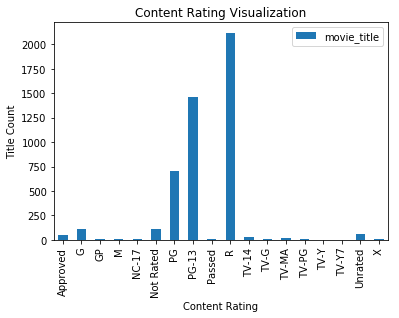

In [23]:
dataBarChart = pd.read_csv(IMDB_Dataset)
dataBarChart[['content_rating','movie_title']].groupby('content_rating').count().plot(kind='bar', title='Content Rating Visualization')
plt.xlabel('Content Rating')
plt.ylabel('Title Count')

As shown above, the majority of movies in the dataset contain a Content Rating of 'R'. 'PG-13' and 'PG' are the only other content types that have a significant presence in the data.

### Country frequency

Text(0, 0.5, 'Title Count')

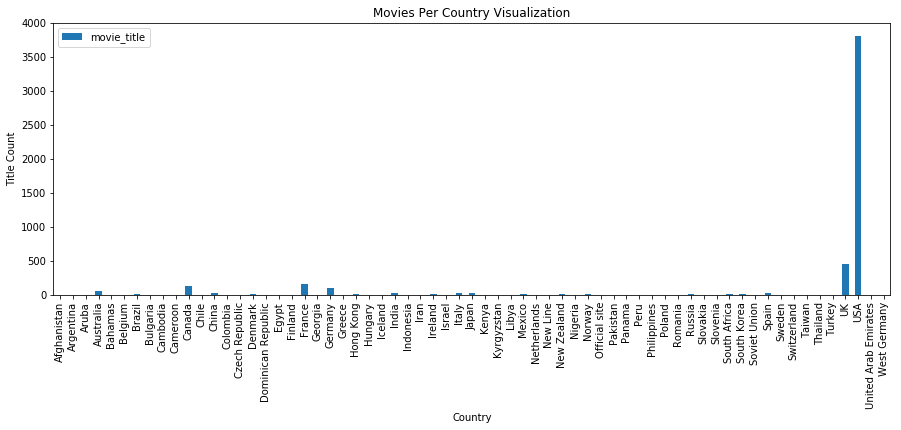

In [24]:
dataBarChart2 = pd.read_csv(IMDB_Dataset)
dataBarChart2[['country','movie_title']].groupby('country').count().plot(kind='bar', title='Movies Per Country Visualization',figsize=(15,5))
plt.xlabel('Country')
plt.ylabel('Title Count')

As shown above, a huge majority of the movies in the dataset are of USA origin. UK, Canada, France and Germany have the next highest frequency but it is dwarfed in comparison to the USA frequency.

### Language frequency

Text(0, 0.5, 'Title Count')

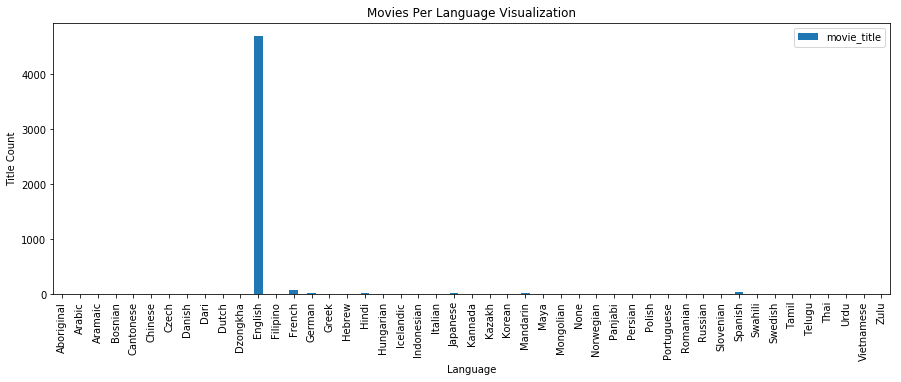

In [25]:
dataBarChart2 = pd.read_csv(IMDB_Dataset)
dataBarChart2[['language','movie_title']].groupby('language').count().plot(kind='bar', title='Movies Per Language Visualization',figsize=(15,5))
plt.xlabel('Language')
plt.ylabel('Title Count')

As shown above, almost all the movies in the dataset are in English.

### Colour frequency

Text(0, 0.5, 'Title Count')

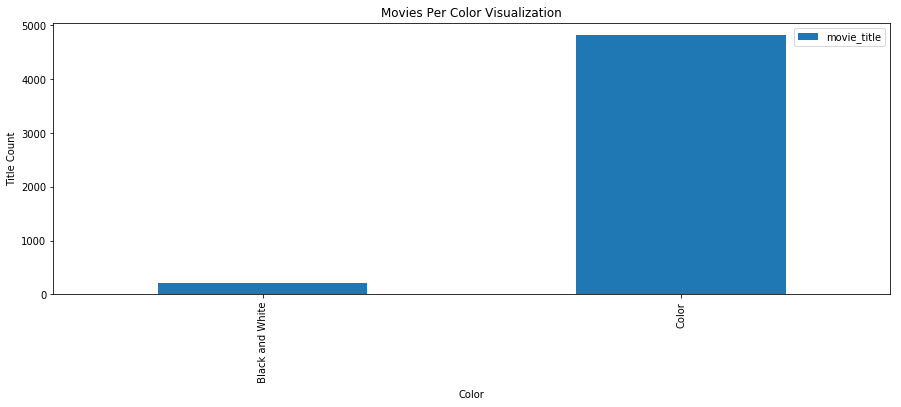

In [26]:
dataBarChart3 = pd.read_csv(IMDB_Dataset)
dataBarChart3[['color','movie_title']].groupby('color').count().plot(kind='bar', title='Movies Per Color Visualization',figsize=(15,5))
plt.xlabel('Color')
plt.ylabel('Title Count')

As shown above, movies in colour make up almost all the movies in the dataset.

### Scatter and correlation graphs

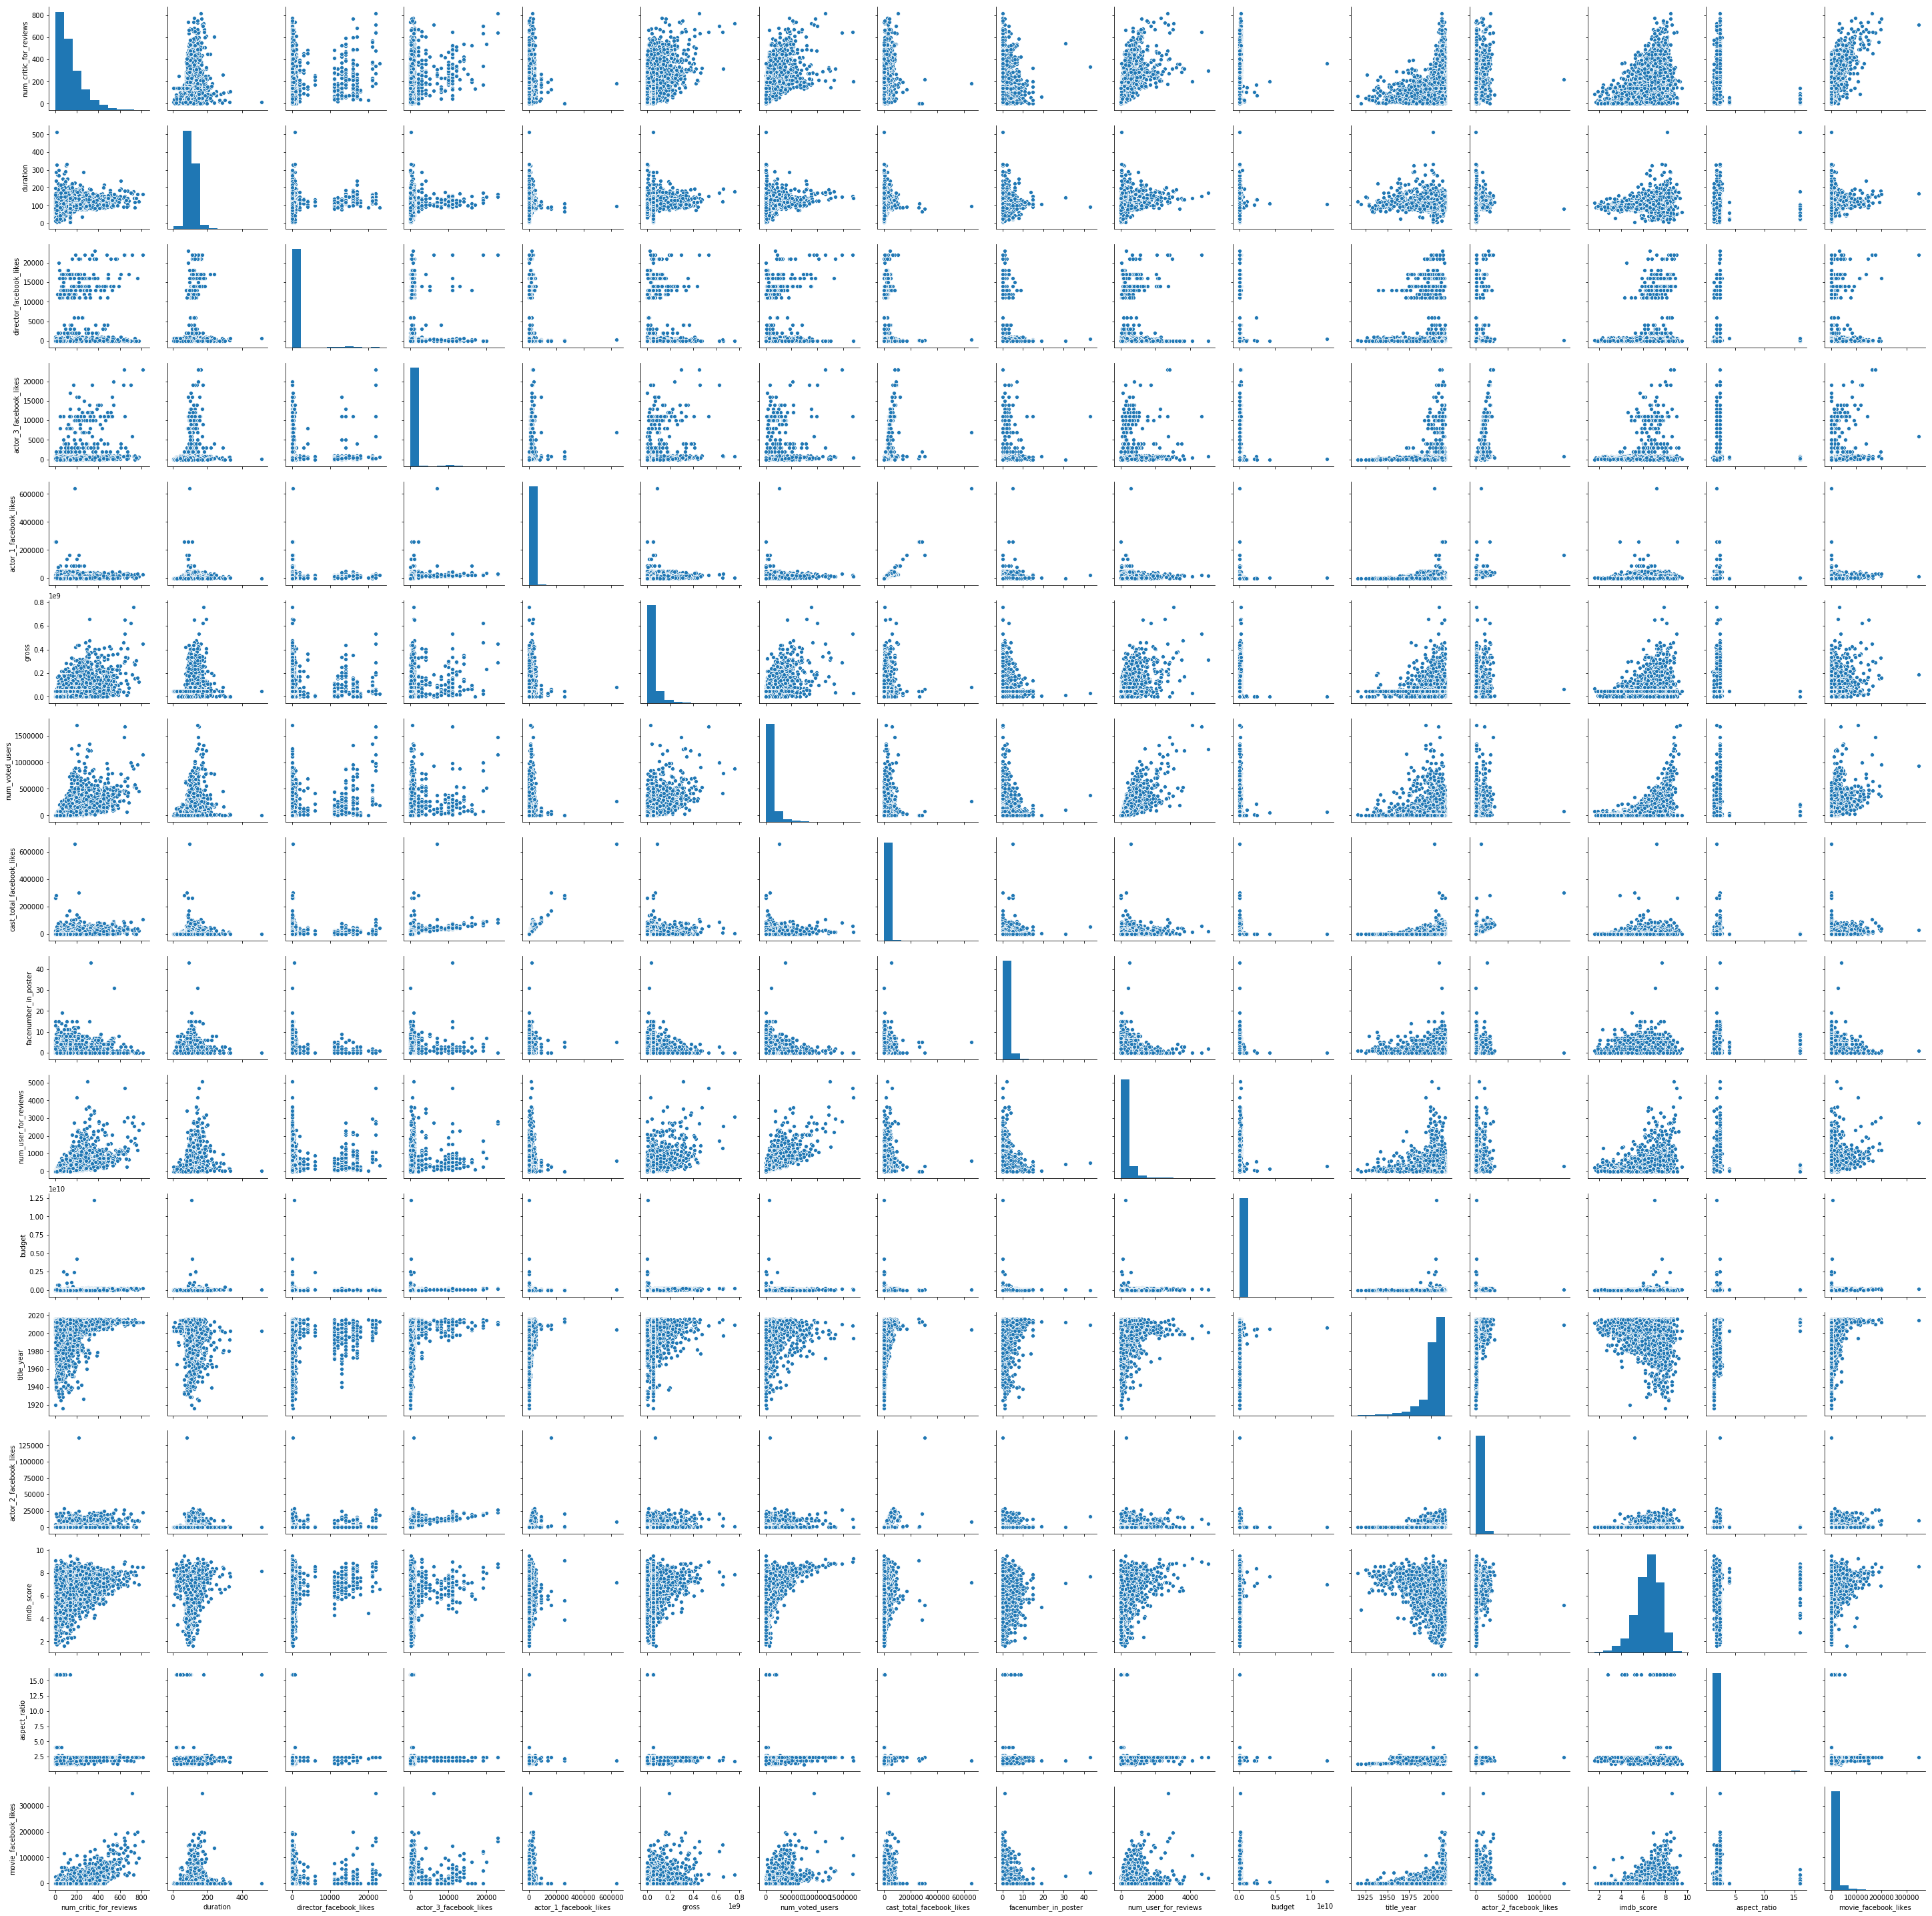

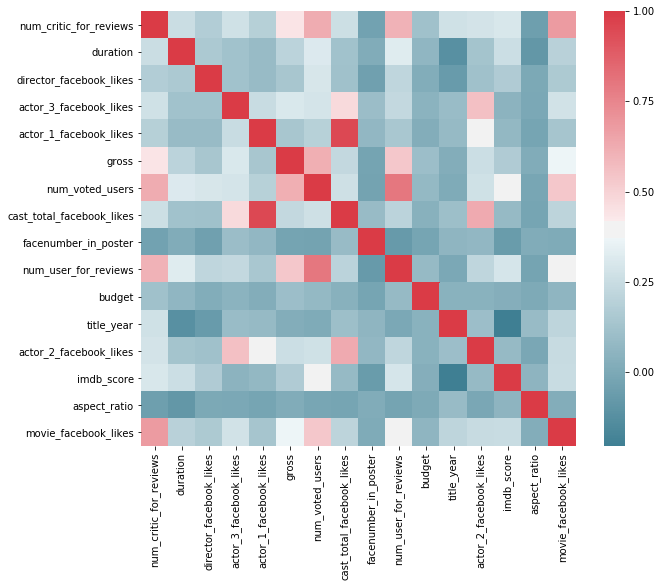

In [27]:
import seaborn as sns

#pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

sns.pairplot(data)

f, ax = plt.subplots(figsize=(10, 8))

corr = data.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### 9. Removing features

In this section, columns that are no longer needed are removed from the dataset.<br>
The columns that were removed are as follows:<br>
genres<br>
movie_title<br>
plot_keywords<br>
movie_imdb_link<br>
Removing columns from the dataset will improve the speed of the machine learning algorithms.

In [28]:
print("Before", data.shape)

data = data.drop(['genres', 'movie_title', 'plot_keywords', 'movie_imdb_link'], axis=1)

"After", data.shape

Before (5043, 28)


('After', (5043, 24))

In [29]:
data.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.000000,178.000000,0.0,855.000000,Joel David Moore,1000.0,7.605058e+08,CCH Pounder,...,3054.000000,English,USA,PG-13,2.370000e+08,2009.000000,936.0,7.9,1.780000,33000
1,Color,Gore Verbinski,302.000000,169.000000,563.0,1000.000000,Orlando Bloom,40000.0,3.094042e+08,Johnny Depp,...,1238.000000,English,USA,PG-13,3.000000e+08,2007.000000,5000.0,7.1,2.350000,0
2,Color,Sam Mendes,602.000000,148.000000,0.0,161.000000,Rory Kinnear,11000.0,2.000742e+08,Christoph Waltz,...,994.000000,English,UK,PG-13,2.450000e+08,2015.000000,393.0,6.8,2.350000,85000
3,Color,Christopher Nolan,813.000000,164.000000,22000.0,23000.000000,Christian Bale,27000.0,4.481306e+08,Tom Hardy,...,2701.000000,English,USA,PG-13,2.500000e+08,2012.000000,23000.0,8.5,2.350000,164000
4,NaN,Doug Walker,140.194272,107.201074,131.0,645.009761,Rob Walker,131.0,4.846841e+07,Doug Walker,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,12.0,7.1,2.220403,0
5,Color,Andrew Stanton,462.000000,132.000000,475.0,530.000000,Samantha Morton,640.0,7.305868e+07,Daryl Sabara,...,738.000000,English,USA,PG-13,2.637000e+08,2012.000000,632.0,6.6,2.350000,24000
6,Color,Sam Raimi,392.000000,156.000000,0.0,4000.000000,James Franco,24000.0,3.365303e+08,J.K. Simmons,...,1902.000000,English,USA,PG-13,2.580000e+08,2007.000000,11000.0,6.2,2.350000,0
7,Color,Nathan Greno,324.000000,100.000000,15.0,284.000000,Donna Murphy,799.0,2.008073e+08,Brad Garrett,...,387.000000,English,USA,PG,2.600000e+08,2010.000000,553.0,7.8,1.850000,29000
8,Color,Joss Whedon,635.000000,141.000000,0.0,19000.000000,Robert Downey Jr.,26000.0,4.589916e+08,Chris Hemsworth,...,1117.000000,English,USA,PG-13,2.500000e+08,2015.000000,21000.0,7.5,2.350000,118000
9,Color,David Yates,375.000000,153.000000,282.0,10000.000000,Daniel Radcliffe,25000.0,3.019570e+08,Alan Rickman,...,973.000000,English,UK,PG,2.500000e+08,2009.000000,11000.0,7.5,2.350000,10000


### 10. Performing transformation of data for analysis

In this section, transformation of the data in the dataset is carried out. Transformation is needed in order to categorize the data into simpler forms in order to aid the machine learning process. For instance, as shown above in part 7 where the language frequency was displayed, English is by far the most prominent language across the dataset. Instead of having 40+ different languages in the dataset, they can be broken down into 2 categories. In this case, Languages are classified either 'English' or 'non-English'. The same technique will be used for all other columns in the dataset until all needed data has a numerically categorized value.

In [30]:
data.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 24 columns):
color                        4 non-null object
director_name                5 non-null object
num_critic_for_reviews       5 non-null float64
duration                     5 non-null float64
director_facebook_likes      5 non-null float64
actor_3_facebook_likes       5 non-null float64
actor_2_name                 5 non-null object
actor_1_facebook_likes       5 non-null float64
gross                        5 non-null float64
actor_1_name                 5 non-null object
num_voted_users              5 non-null int64
cast_total_facebook_likes    5 non-null int64
actor_3_name                 4 non-null object
facenumber_in_poster         5 non-null float64
num_user_for_reviews         5 non-null float64
language                     4 non-null object
country                      4 non-null object
content_rating               4 non-null object
budget                       5 non-null float64

As shown from the output above, there are still a number of string based columns in the dataset.<br>
These columns will need to be converted to numerical data before running machine learning algorithms.<br>
As a result the following columns will need to be altered.

### String transformation

First of all, the transformation of string based data is carried out.<br>
Columns that are changed are as follows:<br>
Color<br>
Language<br>
Country<br>
Content Rating<br>
Directors<br>
Actors

### Colour

There are 2 types of colour in the dataset, "Black and White" or "Color". These were changed to 1 for Black and White and 0 for Color. Due to Color based movies being the dominant presence in the dataset, any missing values were replaced with "Color".

In [31]:
data['color'] = data['color'].fillna("Color")

data['color'] = data['color'].map( {' Black and White': 1, 'Color': 0} ).astype(int)

In [32]:
data.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,James Cameron,723.000000,178.000000,0.0,855.000000,Joel David Moore,1000.0,7.605058e+08,CCH Pounder,...,3054.000000,English,USA,PG-13,2.370000e+08,2009.000000,936.0,7.9,1.780000,33000
1,0,Gore Verbinski,302.000000,169.000000,563.0,1000.000000,Orlando Bloom,40000.0,3.094042e+08,Johnny Depp,...,1238.000000,English,USA,PG-13,3.000000e+08,2007.000000,5000.0,7.1,2.350000,0
2,0,Sam Mendes,602.000000,148.000000,0.0,161.000000,Rory Kinnear,11000.0,2.000742e+08,Christoph Waltz,...,994.000000,English,UK,PG-13,2.450000e+08,2015.000000,393.0,6.8,2.350000,85000
3,0,Christopher Nolan,813.000000,164.000000,22000.0,23000.000000,Christian Bale,27000.0,4.481306e+08,Tom Hardy,...,2701.000000,English,USA,PG-13,2.500000e+08,2012.000000,23000.0,8.5,2.350000,164000
4,0,Doug Walker,140.194272,107.201074,131.0,645.009761,Rob Walker,131.0,4.846841e+07,Doug Walker,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,12.0,7.1,2.220403,0
5,0,Andrew Stanton,462.000000,132.000000,475.0,530.000000,Samantha Morton,640.0,7.305868e+07,Daryl Sabara,...,738.000000,English,USA,PG-13,2.637000e+08,2012.000000,632.0,6.6,2.350000,24000
6,0,Sam Raimi,392.000000,156.000000,0.0,4000.000000,James Franco,24000.0,3.365303e+08,J.K. Simmons,...,1902.000000,English,USA,PG-13,2.580000e+08,2007.000000,11000.0,6.2,2.350000,0
7,0,Nathan Greno,324.000000,100.000000,15.0,284.000000,Donna Murphy,799.0,2.008073e+08,Brad Garrett,...,387.000000,English,USA,PG,2.600000e+08,2010.000000,553.0,7.8,1.850000,29000
8,0,Joss Whedon,635.000000,141.000000,0.0,19000.000000,Robert Downey Jr.,26000.0,4.589916e+08,Chris Hemsworth,...,1117.000000,English,USA,PG-13,2.500000e+08,2015.000000,21000.0,7.5,2.350000,118000
9,0,David Yates,375.000000,153.000000,282.0,10000.000000,Daniel Radcliffe,25000.0,3.019570e+08,Alan Rickman,...,973.000000,English,UK,PG,2.500000e+08,2009.000000,11000.0,7.5,2.350000,10000


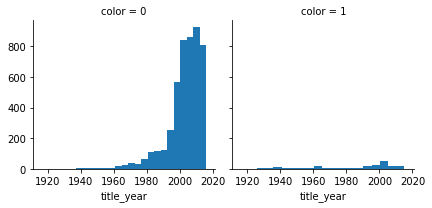

In [33]:
newColor = sns.FacetGrid(data, col='color')
newColor.map(plt.hist, 'title_year', bins=20)

### Language

As shown in Language Frequency in Section 8, English was by far the most frequent language. As a result, English received 0, and any other languages received 1. Missing values were replaced with "English".

In [34]:
data['language'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Italian         11
Russian         11
Portuguese       8
Korean           8
Swedish          5
Arabic           5
Hebrew           5
Danish           5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Chinese          3
Thai             3
Aboriginal       2
Indonesian       2
Zulu             2
Icelandic        2
None             2
Romanian         2
Dari             2
Aramaic          1
Hungarian        1
Tamil            1
Kazakh           1
Kannada          1
Bosnian          1
Urdu             1
Telugu           1
Mongolian        1
Greek            1
Swahili          1
Slovenian        1
Maya             1
Czech            1
Panjabi          1
Filipino         1
Vietnamese       1
Dzongkha         1
Name: language, dtype: int64

In [35]:
data['language'] = data['language'].fillna("English")
data['language'] = data['language'].map(lambda l: 0 if l == 'English' else 1)

In [36]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,James Cameron,723.000000,178.000000,0.0,855.000000,Joel David Moore,1000.0,7.605058e+08,CCH Pounder,...,3054.000000,0,USA,PG-13,2.370000e+08,2009.000000,936.0,7.9,1.780000,33000
1,0,Gore Verbinski,302.000000,169.000000,563.0,1000.000000,Orlando Bloom,40000.0,3.094042e+08,Johnny Depp,...,1238.000000,0,USA,PG-13,3.000000e+08,2007.000000,5000.0,7.1,2.350000,0
2,0,Sam Mendes,602.000000,148.000000,0.0,161.000000,Rory Kinnear,11000.0,2.000742e+08,Christoph Waltz,...,994.000000,0,UK,PG-13,2.450000e+08,2015.000000,393.0,6.8,2.350000,85000
3,0,Christopher Nolan,813.000000,164.000000,22000.0,23000.000000,Christian Bale,27000.0,4.481306e+08,Tom Hardy,...,2701.000000,0,USA,PG-13,2.500000e+08,2012.000000,23000.0,8.5,2.350000,164000
4,0,Doug Walker,140.194272,107.201074,131.0,645.009761,Rob Walker,131.0,4.846841e+07,Doug Walker,...,272.770808,0,NaN,NaN,3.975262e+07,2002.470517,12.0,7.1,2.220403,0


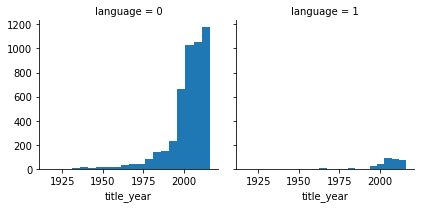

In [37]:
newLanguage = sns.FacetGrid(data, col='language')
newLanguage.map(plt.hist, 'title_year', bins=20)

### Country

As shown in Country Frequency in Section 8, The USA was by far the most frequent country. As a result, The USA received 0, and all other countries received 1. Missing values were replaced with "USA".

In [38]:
data['country'].value_counts()

USA                     3807
UK                       448
France                   154
Canada                   126
Germany                   97
Australia                 55
India                     34
Spain                     33
China                     30
Japan                     23
Italy                     23
Hong Kong                 17
Mexico                    17
New Zealand               15
South Korea               14
Ireland                   12
Denmark                   11
Russia                    11
Norway                     8
South Africa               8
Brazil                     8
Sweden                     6
Netherlands                5
Poland                     5
Thailand                   5
Argentina                  4
Israel                     4
Iran                       4
Romania                    4
Belgium                    4
                        ... 
Greece                     2
Taiwan                     2
Turkey                     1
Peru          

In [39]:
data['country'] = data['country'].fillna("USA")

In [40]:
data['country'] = data['country'].map(lambda c: 0 if c == 'USA' else 1)

In [41]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,James Cameron,723.000000,178.000000,0.0,855.000000,Joel David Moore,1000.0,7.605058e+08,CCH Pounder,...,3054.000000,0,0,PG-13,2.370000e+08,2009.000000,936.0,7.9,1.780000,33000
1,0,Gore Verbinski,302.000000,169.000000,563.0,1000.000000,Orlando Bloom,40000.0,3.094042e+08,Johnny Depp,...,1238.000000,0,0,PG-13,3.000000e+08,2007.000000,5000.0,7.1,2.350000,0
2,0,Sam Mendes,602.000000,148.000000,0.0,161.000000,Rory Kinnear,11000.0,2.000742e+08,Christoph Waltz,...,994.000000,0,1,PG-13,2.450000e+08,2015.000000,393.0,6.8,2.350000,85000
3,0,Christopher Nolan,813.000000,164.000000,22000.0,23000.000000,Christian Bale,27000.0,4.481306e+08,Tom Hardy,...,2701.000000,0,0,PG-13,2.500000e+08,2012.000000,23000.0,8.5,2.350000,164000
4,0,Doug Walker,140.194272,107.201074,131.0,645.009761,Rob Walker,131.0,4.846841e+07,Doug Walker,...,272.770808,0,0,NaN,3.975262e+07,2002.470517,12.0,7.1,2.220403,0


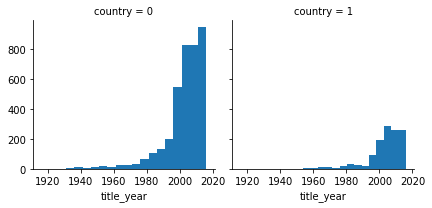

In [42]:
newCountry = sns.FacetGrid(data, col='country')
newCountry.map(plt.hist, 'title_year', bins=20)

### Content Rating

As shown in Content Rating Frequency in Section 8, There were 4 rating types that feature most prominently. Those were "R", "PG-13", "PG", "G" and "Not Rated". These values will be changed as follows:<br>
G = 0<br>
PG = 1<br>
PG-13 = 2<br>
R = 3<br>
Movies that featured missing values were treated as the next most frequent rating type which was "Not Rated". This received a value of 4. 

In [43]:
data['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64

In [44]:
data['content_rating'] = data['content_rating'].map({'G':0, 'PG':1, 'PG-13': 2, 'R': 3}).fillna(4).astype(int)

In [45]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,James Cameron,723.000000,178.000000,0.0,855.000000,Joel David Moore,1000.0,7.605058e+08,CCH Pounder,...,3054.000000,0,0,2,2.370000e+08,2009.000000,936.0,7.9,1.780000,33000
1,0,Gore Verbinski,302.000000,169.000000,563.0,1000.000000,Orlando Bloom,40000.0,3.094042e+08,Johnny Depp,...,1238.000000,0,0,2,3.000000e+08,2007.000000,5000.0,7.1,2.350000,0
2,0,Sam Mendes,602.000000,148.000000,0.0,161.000000,Rory Kinnear,11000.0,2.000742e+08,Christoph Waltz,...,994.000000,0,1,2,2.450000e+08,2015.000000,393.0,6.8,2.350000,85000
3,0,Christopher Nolan,813.000000,164.000000,22000.0,23000.000000,Christian Bale,27000.0,4.481306e+08,Tom Hardy,...,2701.000000,0,0,2,2.500000e+08,2012.000000,23000.0,8.5,2.350000,164000
4,0,Doug Walker,140.194272,107.201074,131.0,645.009761,Rob Walker,131.0,4.846841e+07,Doug Walker,...,272.770808,0,0,4,3.975262e+07,2002.470517,12.0,7.1,2.220403,0


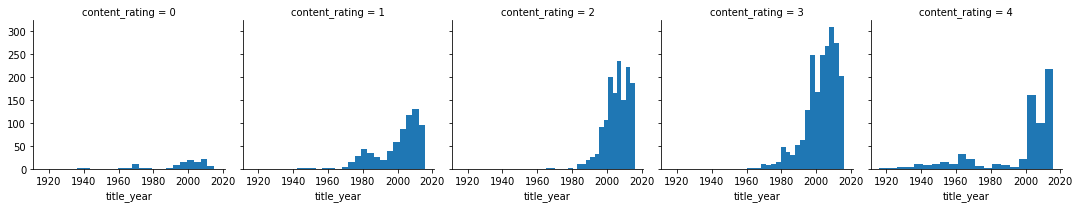

In [46]:
newContent = sns.FacetGrid(data, col='content_rating')
newContent.map(plt.hist, 'title_year', bins=20)

"R" rated movies were the most prominent movie rating in the dataset, and this is again echoed by the frequency of the new content_rating of 3, which replaced "R".

### Actors and directors

Two arrays are created, for for actors and one for directors. A for loop sets about checking all the actors for missing values. Those who are present are put into the actors array. The same is done for directors

In [47]:
actors = {}
directors = {}

for index, row in data.iterrows():
    for actor in row[['actor_1_name', 'actor_2_name', 'actor_3_name']]:
        if actor is not np.nan:
            if actor not in actors:
                actors[actor] = 0
            actors[actor] += 1
    director = row['director_name']
    if director is not np.nan:
        if director not in directors:
            directors[director] = 0
        directors[director] += 1  

In [48]:
data['num_of_films_director'] = data["director_name"].dropna().map(directors).astype(int)
data['num_of_films_director'] = data['num_of_films_director'].fillna(1)

A categorical band called NumFilmsBand is created. It is so as to split directors into 4 seprate categories based on how many films they have directed.

In [49]:
data['NumFilmsBand'] = pd.cut(data['num_of_films_director'], 4)
data[['NumFilmsBand', 'imdb_score']].groupby(['NumFilmsBand'], as_index=False).mean().sort_values(by='NumFilmsBand', ascending=True)

,NumFilmsBand,imdb_score
0,"(0.975, 7.25]",6.378122
1,"(7.25, 13.5]",6.710269
2,"(13.5, 19.75]",6.670213
3,"(19.75, 26.0]",7.345455


In [50]:
data.loc[ data['num_of_films_director'] <= 7, 'num_of_films_director'] = 0
data.loc[(data['num_of_films_director'] > 7) & (data['num_of_films_director'] <= 13), 'num_of_films_director'] = 1
data.loc[(data['num_of_films_director'] > 13) & (data['num_of_films_director'] <= 19), 'num_of_films_director'] = 2
data.loc[ data['num_of_films_director'] > 19, 'num_of_films_director'] = 3
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,NumFilmsBand
0,0,James Cameron,723.000000,178.000000,0.0,855.000000,Joel David Moore,1000.0,7.605058e+08,CCH Pounder,...,0,2,2.370000e+08,2009.000000,936.0,7.9,1.780000,33000,0.0,"(0.975, 7.25]"
1,0,Gore Verbinski,302.000000,169.000000,563.0,1000.000000,Orlando Bloom,40000.0,3.094042e+08,Johnny Depp,...,0,2,3.000000e+08,2007.000000,5000.0,7.1,2.350000,0,0.0,"(0.975, 7.25]"
2,0,Sam Mendes,602.000000,148.000000,0.0,161.000000,Rory Kinnear,11000.0,2.000742e+08,Christoph Waltz,...,1,2,2.450000e+08,2015.000000,393.0,6.8,2.350000,85000,1.0,"(7.25, 13.5]"
3,0,Christopher Nolan,813.000000,164.000000,22000.0,23000.000000,Christian Bale,27000.0,4.481306e+08,Tom Hardy,...,0,2,2.500000e+08,2012.000000,23000.0,8.5,2.350000,164000,1.0,"(7.25, 13.5]"
4,0,Doug Walker,140.194272,107.201074,131.0,645.009761,Rob Walker,131.0,4.846841e+07,Doug Walker,...,0,4,3.975262e+07,2002.470517,12.0,7.1,2.220403,0,0.0,"(0.975, 7.25]"


Now that the name and number of how many movies a director has been in is now mapped to a numerical value between 0 and 3, we no longer need the director_name and NumFilmsBand columns

In [51]:
data = data.drop(['director_name', 'NumFilmsBand'], axis=1)

The exact same technique is done for actors based on how many films they have been in

In [52]:
data["actor_1_name"].dropna().map(actors).describe()

count    5036.000000
mean       11.901509
std        11.397618
min         1.000000
25%         3.000000
50%         8.000000
75%        19.000000
max        54.000000
Name: actor_1_name, dtype: float64

In [53]:
data['num_of_films_actor_1'] = data["actor_1_name"].dropna().map(actors).astype(int)
data['num_of_films_actor_1'] = data['num_of_films_actor_1'].fillna(8)

In [54]:
data["actor_2_name"].dropna().map(actors).describe()

count    5030.000000
mean        6.411730
std         7.443835
min         1.000000
25%         1.000000
50%         4.000000
75%         8.000000
max        54.000000
Name: actor_2_name, dtype: float64

In [55]:
data['num_of_films_actor_2'] = data["actor_2_name"].dropna().map(actors).astype(int)
data['num_of_films_actor_2'] = data['num_of_films_actor_2'].fillna(4)

In [56]:
data["actor_3_name"].dropna().map(actors).describe()

count    5020.000000
mean        4.116135
std         4.746142
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        47.000000
Name: actor_3_name, dtype: float64

In [57]:
data['num_of_films_actor_3'] = data["actor_3_name"].dropna().map(actors).astype(int)
data['num_of_films_actor_3'] = data['num_of_films_actor_3'].fillna(2)

In [58]:
data['actor_sum'] = data["num_of_films_actor_1"] + data["num_of_films_actor_2"] + data["num_of_films_actor_3"]

In [59]:
data['ActorSumBand'] = pd.cut(data['actor_sum'], 5)
data[['ActorSumBand', 'imdb_score']].groupby(['ActorSumBand'], as_index=False).mean().sort_values(by='ActorSumBand', ascending=True)

,ActorSumBand,imdb_score
0,"(2.892, 24.6]",6.346829
1,"(24.6, 46.2]",6.544147
2,"(46.2, 67.8]",6.692661
3,"(67.8, 89.4]",6.877465
4,"(89.4, 111.0]",7.228571


In [60]:
data.loc[ data['actor_sum'] <= 24, 'actor_sum'] = 0
data.loc[(data['actor_sum'] > 24) & (data['actor_sum'] <= 46), 'actor_sum'] = 1
data.loc[(data['actor_sum'] > 46) & (data['actor_sum'] <= 67), 'actor_sum'] = 2
data.loc[(data['actor_sum'] > 67) & (data['actor_sum'] <= 89), 'actor_sum'] = 3
data.loc[ data['actor_sum'] > 89, 'actor_sum'] = 4

In [61]:
data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,num_voted_users,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,num_of_films_actor_1,num_of_films_actor_2,num_of_films_actor_3,actor_sum,ActorSumBand
0,0,723.000000,178.000000,0.0,855.000000,Joel David Moore,1000.0,7.605058e+08,CCH Pounder,886204,...,936.0,7.9,1.780000,33000,0.0,7.0,7.0,6.0,0.0,"(2.892, 24.6]"
1,0,302.000000,169.000000,563.0,1000.000000,Orlando Bloom,40000.0,3.094042e+08,Johnny Depp,471220,...,5000.0,7.1,2.350000,0,0.0,41.0,11.0,6.0,2.0,"(46.2, 67.8]"
2,0,602.000000,148.000000,0.0,161.000000,Rory Kinnear,11000.0,2.000742e+08,Christoph Waltz,275868,...,393.0,6.8,2.350000,85000,1.0,10.0,5.0,1.0,0.0,"(2.892, 24.6]"
3,0,813.000000,164.000000,22000.0,23000.000000,Christian Bale,27000.0,4.481306e+08,Tom Hardy,1144337,...,23000.0,8.5,2.350000,164000,1.0,13.0,28.0,19.0,2.0,"(46.2, 67.8]"
4,0,140.194272,107.201074,131.0,645.009761,Rob Walker,131.0,4.846841e+07,Doug Walker,8,...,12.0,7.1,2.220403,0,0.0,1.0,1.0,2.0,0.0,"(2.892, 24.6]"


In [62]:
data = data.drop(['actor_1_name', 'num_of_films_actor_1', 'actor_2_name', 'num_of_films_actor_2', 'actor_3_name', 'num_of_films_actor_3', 'ActorSumBand'], axis=1)

In [63]:
data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
0,0,723.000000,178.000000,0.0,855.000000,1000.0,7.605058e+08,886204,4834,0.0,...,0,2,2.370000e+08,2009.000000,936.0,7.9,1.780000,33000,0.0,0.0
1,0,302.000000,169.000000,563.0,1000.000000,40000.0,3.094042e+08,471220,48350,0.0,...,0,2,3.000000e+08,2007.000000,5000.0,7.1,2.350000,0,0.0,2.0
2,0,602.000000,148.000000,0.0,161.000000,11000.0,2.000742e+08,275868,11700,1.0,...,1,2,2.450000e+08,2015.000000,393.0,6.8,2.350000,85000,1.0,0.0
3,0,813.000000,164.000000,22000.0,23000.000000,27000.0,4.481306e+08,1144337,106759,0.0,...,0,2,2.500000e+08,2012.000000,23000.0,8.5,2.350000,164000,1.0,2.0
4,0,140.194272,107.201074,131.0,645.009761,131.0,4.846841e+07,8,143,0.0,...,0,4,3.975262e+07,2002.470517,12.0,7.1,2.220403,0,0.0,0.0


### Numerical transformation

Now the transformation of numerical data is carried out.<br>
The following columns are altered:<br>
imdb_score<br>
aspect_ratio<br>
actor_1_facebook_likes<br>
actor_2_facebook_likes<br>
actor_3_facebook_likes<br>
duration<br>
gross<br>
budget<br>
title_year<br>
facenumber_in_poster<br>
num_of_films_director<br>
num_critic_for_reviews<br>
director_facebook_likes<br>
num_user_for_reviews<br>
num_voted_users<br>
cast_total_facebook_likes<br>
movie_facebook_likes



In [64]:
data.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 22 columns):
color                        5 non-null int64
num_critic_for_reviews       5 non-null float64
duration                     5 non-null float64
director_facebook_likes      5 non-null float64
actor_3_facebook_likes       5 non-null float64
actor_1_facebook_likes       5 non-null float64
gross                        5 non-null float64
num_voted_users              5 non-null int64
cast_total_facebook_likes    5 non-null int64
facenumber_in_poster         5 non-null float64
num_user_for_reviews         5 non-null float64
language                     5 non-null int64
country                      5 non-null int64
content_rating               5 non-null int64
budget                       5 non-null float64
title_year                   5 non-null float64
actor_2_facebook_likes       5 non-null float64
imdb_score                   5 non-null float64
aspect_ratio                 5 non-null float64

### imdb_score

In order to get a better understanding of the spread of data in the dataset, movies will be separated into 2 groups. <br>
Group 0 are movies with an imdb_score less than 7. Movies in this group can be regarded as average.<br>
Group 1 are movies with an imdb_score greater than or equal to 7. Movies in this group can be regarded as good.<br>
As mentioned above, doing this will aid the machine learning process as there will only be 2 types of imdb_score, 1 or 0, instead of a large amount of unrelated decimal scores i.e. 9.4, 6.7, 8.2 etc

In [65]:
data.loc[ data['imdb_score'] < 7.0, 'imdb_score'] = 0
data.loc[ data['imdb_score'] >= 7.0, 'imdb_score'] = 1
data.head(100)

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
0,0,723.000000,178.000000,0.0,855.000000,1000.0,7.605058e+08,886204,4834,0.000000,...,0,2,2.370000e+08,2009.000000,936.0,1.0,1.780000,33000,0.0,0.0
1,0,302.000000,169.000000,563.0,1000.000000,40000.0,3.094042e+08,471220,48350,0.000000,...,0,2,3.000000e+08,2007.000000,5000.0,1.0,2.350000,0,0.0,2.0
2,0,602.000000,148.000000,0.0,161.000000,11000.0,2.000742e+08,275868,11700,1.000000,...,1,2,2.450000e+08,2015.000000,393.0,0.0,2.350000,85000,1.0,0.0
3,0,813.000000,164.000000,22000.0,23000.000000,27000.0,4.481306e+08,1144337,106759,0.000000,...,0,2,2.500000e+08,2012.000000,23000.0,1.0,2.350000,164000,1.0,2.0
4,0,140.194272,107.201074,131.0,645.009761,131.0,4.846841e+07,8,143,0.000000,...,0,4,3.975262e+07,2002.470517,12.0,1.0,2.220403,0,0.0,0.0
5,0,462.000000,132.000000,475.0,530.000000,640.0,7.305868e+07,212204,1873,1.000000,...,0,2,2.637000e+08,2012.000000,632.0,0.0,2.350000,24000,0.0,0.0
6,0,392.000000,156.000000,0.0,4000.000000,24000.0,3.365303e+08,383056,46055,0.000000,...,0,2,2.580000e+08,2007.000000,11000.0,0.0,2.350000,0,1.0,3.0
7,0,324.000000,100.000000,15.0,284.000000,799.0,2.008073e+08,294810,2036,1.000000,...,0,1,2.600000e+08,2010.000000,553.0,1.0,1.850000,29000,0.0,0.0
8,0,635.000000,141.000000,0.0,19000.000000,26000.0,4.589916e+08,462669,92000,4.000000,...,0,2,2.500000e+08,2015.000000,21000.0,1.0,2.350000,118000,0.0,3.0
9,0,375.000000,153.000000,282.0,10000.000000,25000.0,3.019570e+08,321795,58753,3.000000,...,1,1,2.500000e+08,2009.000000,11000.0,1.0,2.350000,10000,0.0,1.0


In order to see what this has done to the dataset, analysis similar to the 'Content Rating Frequency' can be done.<br>
In this analysis, the 

In [66]:
#data[['imdb_score']].groupby(['imdb_score'], as_index=False).mean().sort_values(by='imdb_score', ascending=False)

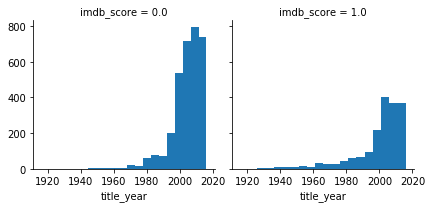

In [67]:
newImdb_Score = sns.FacetGrid(data, col='imdb_score')
newImdb_Score.map(plt.hist, 'title_year', bins=20)

The graph above shows the frequency of movies per year based on the new imdb_score of either 0 or 1.

### Aspect Ratio

Based on the output below, there are several different aspect ratios, some differing marginally. This perhaps hints towards disrepencies in data for the aspect_ratio.<br><br>
Looking at the reference below, there appears to be 5 traditionally common aspect ratios:<br>
4:3 (1.33) - Older non HD TVs<br>
16:9 (1.77) - Modern HD TVs<br>
21:9 (2.35) - Most Movies<br>
14:10 (1.4) - IMAX Movies<br>
19:10 (1.9) - IMAX Digital<br>
https://calculateaspectratio.com/aspect-ratio

In [68]:
data["aspect_ratio"].describe()

count    5043.000000
mean        2.220403
std         1.339160
min         1.180000
25%         1.850000
50%         2.220403
75%         2.350000
max        16.000000
Name: aspect_ratio, dtype: float64

The aspect_ratios are altered in order to replicate these findings. First of all, any missing values are filled with 2.35 (21:9) which is the most popular aspect ratio in the dataset. The aspect_ratios that were 4.00 and 16.00 are changed to 1.33 and 1.78 respectively.

In [69]:
#ratioMean = data['aspect_ratio'].mean()
#data['aspect_ratio'] = data['aspect_ratio'].fillna(ratioMean)
data['aspect_ratio'] = data['aspect_ratio'].fillna(2.35)
data['aspect_ratio'] = data['aspect_ratio'].map(lambda ar: 1.33 if ar == 4.00 else ar)
data['aspect_ratio'] = data['aspect_ratio'].map(lambda ar: 1.78 if ar == 16.00 else ar)

The aspect ratios are banded together into 4 different categories. This will allow the transformation of all aspect ratios into 4 even more narrowed down categories:<br>

In [70]:
data[['aspect_ratio']].groupby(pd.cut(data['aspect_ratio'], 4)).mean()

,aspect_ratio
aspect_ratio,
"(1.178, 1.575]",1.353167
"(1.575, 1.97]",1.839038
"(1.97, 2.365]",2.332750
"(2.365, 2.76]",2.453478


If the aspect_ratio band is less than or equal to 1.575 - aspect ratio = 0
If the aspect_ratio band is greater than 1.575 and less than or equal to 1.97 - aspect ratio = 1<br>
If the aspect_ratio band is greater than 1.97 and less than or equal to 2.365 - aspect ratio = 2<br>
If the aspect_ratio band is greater than 2.365 - aspect ratio = 3<br>

In [71]:
data.loc[ data['aspect_ratio'] <= 1.575, 'aspect_ratio'] = 0
data.loc[(data['aspect_ratio'] > 1.575) & (data['aspect_ratio'] <= 1.97), 'aspect_ratio'] = 1
data.loc[(data['aspect_ratio'] > 1.97) & (data['aspect_ratio'] <= 2.365), 'aspect_ratio'] = 2
data.loc[ data['aspect_ratio'] > 2.365, 'aspect_ratio'] = 3

In [72]:
#data.loc[ data['aspect_ratio'] <= 0.75, 'aspect_ratio'] = 0
#data.loc[(data['aspect_ratio'] > 0.75) & (data['aspect_ratio'] <= 1.5), 'aspect_ratio'] = 1
#data.loc[(data['aspect_ratio'] > 1.5) & (data['aspect_ratio'] <= 2.25), 'aspect_ratio'] = 2
#data.loc[ data['aspect_ratio'] > 2.25, 'aspect_ratio'] = 3

The aspect_ratio is transformed to either 0, 1, 2 or 3 and the results of these changes can be seen from the output below

In [73]:
data['aspect_ratio'].value_counts()

2.0    2710
1.0    2130
0.0     180
3.0      23
Name: aspect_ratio, dtype: int64

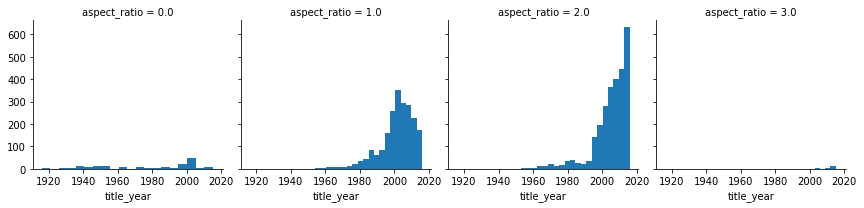

In [74]:
newRatio = sns.FacetGrid(data, col='aspect_ratio')
newRatio.map(plt.hist, 'title_year', bins=20)

As shown above, movies falling into the category of 2 are the most popular, namely due to the popularity of the 2.3 (21:9) aspect_ratio for movies

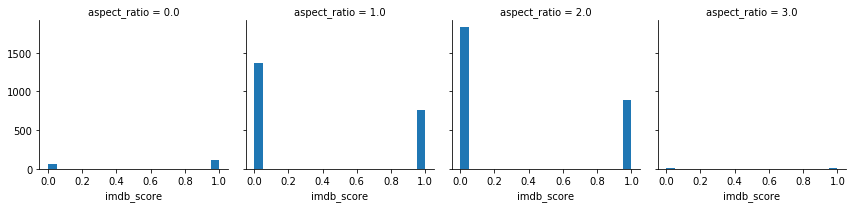

In [75]:
newRatio = sns.FacetGrid(data, col='aspect_ratio')
newRatio.map(plt.hist, 'imdb_score', bins=20)

### Actor facebook likes

In this section, the figures representing the total number of facebook likes for Actor 1, 2 and 3 are cleaned up.<br>
First of all among these alterations is the replacing of any null values with the mean value.<br>
The mean values for each actor's likes are displayed below.

In [76]:
actor1Mean = data['actor_1_facebook_likes'].mean()
actor1SD = data['actor_1_facebook_likes'].std()
actor1Mean, actor1SD

(6560.047061159651, 15010.32855339306)

In [77]:
actor2Mean = data['actor_2_facebook_likes'].mean()
actor2SD = data['actor_2_facebook_likes'].std()
actor2Mean, actor2SD

(1651.7544731610335, 4037.2241043097997)

In [78]:
actor3Mean = data['actor_3_facebook_likes'].mean()
actor3SD = data['actor_3_facebook_likes'].std()
actor3Mean, actor3SD

(645.0097609561758, 1661.2396922352452)

### Replace null values with mean

In [79]:
data['actor_1_facebook_likes'] = data['actor_1_facebook_likes'].map(lambda v: mean if pd.isnull(v) else v)

In [80]:
data['actor_2_facebook_likes'] = data['actor_2_facebook_likes'].map(lambda v: mean if pd.isnull(v) else v)

In [81]:
data['actor_3_facebook_likes'] = data['actor_3_facebook_likes'].map(lambda v: mean if pd.isnull(v) else v)

In [82]:
data['actor_1_facebook_likes'].describe()

count      5043.000000
mean       6560.047061
std       15010.328553
min           0.000000
25%         615.500000
50%         989.000000
75%       11000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

In [83]:
data['actor_2_facebook_likes'].describe()

count      5043.000000
mean       1651.754473
std        4037.224104
min           0.000000
25%         281.000000
50%         596.000000
75%         919.000000
max      137000.000000
Name: actor_2_facebook_likes, dtype: float64

In [84]:
data['actor_3_facebook_likes'].describe()

count     5043.000000
mean       645.009761
std       1661.239692
min          0.000000
25%        134.500000
50%        374.000000
75%        638.000000
max      23000.000000
Name: actor_3_facebook_likes, dtype: float64

The number of facebook likes for each actor are banded together into 5 different categories. This will allow the transformation of all of each actors likes to be broken down into 5 even more narrowed down categories:<br>

In [85]:
data[['actor_1_facebook_likes']].groupby(pd.qcut(data['actor_1_facebook_likes'], 5)).mean()

,actor_1_facebook_likes
actor_1_facebook_likes,
"(-0.001, 523.0]",250.647233
"(523.0, 865.0]",702.347869
"(865.0, 2000.0]",1137.117597
"(2000.0, 13000.0]",8956.717418
"(13000.0, 640000.0]",24597.374179


If the actor_1_facebook_likes band is less than or equal to 523 - actor_1_facebook_likes = 0
If the actor_1_facebook_likes band is greater than 523 and less than or equal to 865 - actor_1_facebook_likes = 1<br>
If the actor_1_facebook_likes band is greater than 865 and less than or equal to 2000 - actor_1_facebook_likes = 2<br>
If the actor_1_facebook_likes is greater than 2000 and less than or equal to 13000 - actor_1_facebook_likes = 3<br>
If the actor_1_facebook_likes is greater than 13000 - actor_1_facebook_likes = 4

In [86]:
data.loc[ data['actor_1_facebook_likes'] <= 523, 'actor_1_facebook_likes'] = 0
data.loc[(data['actor_1_facebook_likes'] > 523) & (data['actor_1_facebook_likes'] <= 865), 'actor_1_facebook_likes'] = 1
data.loc[(data['actor_1_facebook_likes'] > 865) & (data['actor_1_facebook_likes'] <= 2000), 'actor_1_facebook_likes'] = 2
data.loc[(data['actor_1_facebook_likes'] > 2000) & (data['actor_1_facebook_likes'] <= 13000), 'actor_1_facebook_likes'] = 3
data.loc[ data['actor_1_facebook_likes'] > 13000, 'actor_1_facebook_likes'] = 4

data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
0,0,723.000000,178.000000,0.0,855.000000,2.0,7.605058e+08,886204,4834,0.0,...,0,2,2.370000e+08,2009.000000,936.0,1.0,1.0,33000,0.0,0.0
1,0,302.000000,169.000000,563.0,1000.000000,4.0,3.094042e+08,471220,48350,0.0,...,0,2,3.000000e+08,2007.000000,5000.0,1.0,2.0,0,0.0,2.0
2,0,602.000000,148.000000,0.0,161.000000,3.0,2.000742e+08,275868,11700,1.0,...,1,2,2.450000e+08,2015.000000,393.0,0.0,2.0,85000,1.0,0.0
3,0,813.000000,164.000000,22000.0,23000.000000,4.0,4.481306e+08,1144337,106759,0.0,...,0,2,2.500000e+08,2012.000000,23000.0,1.0,2.0,164000,1.0,2.0
4,0,140.194272,107.201074,131.0,645.009761,0.0,4.846841e+07,8,143,0.0,...,0,4,3.975262e+07,2002.470517,12.0,1.0,2.0,0,0.0,0.0


In [87]:
data[['actor_2_facebook_likes']].groupby(pd.qcut(data['actor_2_facebook_likes'], 5)).mean()

,actor_2_facebook_likes
actor_2_facebook_likes,
"(-0.001, 218.0]",88.086139
"(218.0, 486.0]",353.162537
"(486.0, 726.2]",602.864945
"(726.2, 979.0]",859.861249
"(979.0, 137000.0]",6358.933341


If the actor_2_facebook_likes band is less than or equal to 218 - actor_2_facebook_likes = 0
If the actor_2_facebook_likes band is greater than 218 and less than or equal to 486 - actor_2_facebook_likes = 1<br>
If the actor_2_facebook_likes band is greater than 486 and less than or equal to 726.2 - actor_2_facebook_likes = 2<br>
If the actor_2_facebook_likes is greater than 726.2 and less than or equal to 979 - actor_2_facebook_likes = 3<br>
If the actor_2_facebook_likes is greater than 979 - actor_2_facebook_likes = 4

In [88]:
data.loc[ data['actor_2_facebook_likes'] <= 218, 'actor_2_facebook_likes'] = 0
data.loc[(data['actor_2_facebook_likes'] > 218) & (data['actor_2_facebook_likes'] <= 486), 'actor_2_facebook_likes'] = 1
data.loc[(data['actor_2_facebook_likes'] > 486) & (data['actor_2_facebook_likes'] <= 726.2), 'actor_2_facebook_likes'] = 2
data.loc[(data['actor_2_facebook_likes'] > 726.2) & (data['actor_2_facebook_likes'] <= 979), 'actor_2_facebook_likes'] = 3
data.loc[ data['actor_2_facebook_likes'] > 979, 'actor_2_facebook_likes'] = 4

data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
0,0,723.000000,178.000000,0.0,855.000000,2.0,7.605058e+08,886204,4834,0.0,...,0,2,2.370000e+08,2009.000000,3.0,1.0,1.0,33000,0.0,0.0
1,0,302.000000,169.000000,563.0,1000.000000,4.0,3.094042e+08,471220,48350,0.0,...,0,2,3.000000e+08,2007.000000,4.0,1.0,2.0,0,0.0,2.0
2,0,602.000000,148.000000,0.0,161.000000,3.0,2.000742e+08,275868,11700,1.0,...,1,2,2.450000e+08,2015.000000,1.0,0.0,2.0,85000,1.0,0.0
3,0,813.000000,164.000000,22000.0,23000.000000,4.0,4.481306e+08,1144337,106759,0.0,...,0,2,2.500000e+08,2012.000000,4.0,1.0,2.0,164000,1.0,2.0
4,0,140.194272,107.201074,131.0,645.009761,0.0,4.846841e+07,8,143,0.0,...,0,4,3.975262e+07,2002.470517,0.0,1.0,2.0,0,0.0,0.0


In [89]:
data[['actor_3_facebook_likes']].groupby(pd.qcut(data['actor_3_facebook_likes'], 5)).mean()

,actor_3_facebook_likes
actor_3_facebook_likes,
"(-0.001, 97.0]",38.345203
"(97.0, 265.0]",179.494059
"(265.0, 472.0]",370.867589
"(472.0, 700.0]",582.733025
"(700.0, 23000.0]",2058.519364


If the actor_3_facebook_likes band is less than or equal to 97 - actor_3_facebook_likes = 0
If the actor_3_facebook_likes band is greater than 97 and less than or equal to 265 - actor_3_facebook_likes = 1<br>
If the actor_3_facebook_likes band is greater than 265 and less than or equal to 472 - actor_3_facebook_likes = 2<br>
If the actor_3_facebook_likes is greater than 472 and less than or equal to 700 - actor_3_facebook_likes = 3<br>
If the actor_3_facebook_likes is greater than 700 - actor_3_facebook_likes = 4

In [90]:
data.loc[ data['actor_3_facebook_likes'] <= 97, 'actor_3_facebook_likes'] = 0
data.loc[(data['actor_3_facebook_likes'] > 97) & (data['actor_3_facebook_likes'] <= 265), 'actor_3_facebook_likes'] = 1
data.loc[(data['actor_3_facebook_likes'] > 265) & (data['actor_3_facebook_likes'] <= 472), 'actor_3_facebook_likes'] = 2
data.loc[(data['actor_3_facebook_likes'] > 472) & (data['actor_3_facebook_likes'] <= 700), 'actor_3_facebook_likes'] = 3
data.loc[ data['actor_3_facebook_likes'] > 700, 'actor_3_facebook_likes'] = 4

data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
0,0,723.000000,178.000000,0.0,4.0,2.0,7.605058e+08,886204,4834,0.0,...,0,2,2.370000e+08,2009.000000,3.0,1.0,1.0,33000,0.0,0.0
1,0,302.000000,169.000000,563.0,4.0,4.0,3.094042e+08,471220,48350,0.0,...,0,2,3.000000e+08,2007.000000,4.0,1.0,2.0,0,0.0,2.0
2,0,602.000000,148.000000,0.0,1.0,3.0,2.000742e+08,275868,11700,1.0,...,1,2,2.450000e+08,2015.000000,1.0,0.0,2.0,85000,1.0,0.0
3,0,813.000000,164.000000,22000.0,4.0,4.0,4.481306e+08,1144337,106759,0.0,...,0,2,2.500000e+08,2012.000000,4.0,1.0,2.0,164000,1.0,2.0
4,0,140.194272,107.201074,131.0,3.0,0.0,4.846841e+07,8,143,0.0,...,0,4,3.975262e+07,2002.470517,0.0,1.0,2.0,0,0.0,0.0


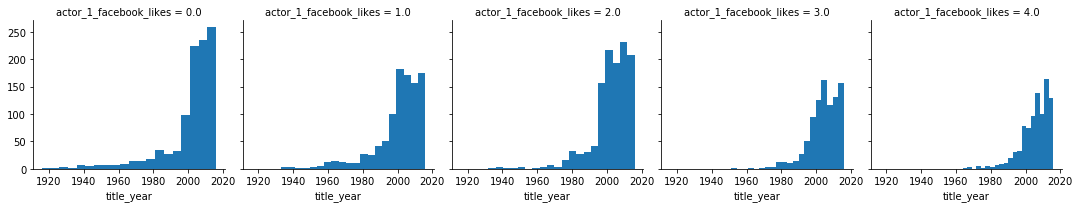

In [91]:
newActor1_FB = sns.FacetGrid(data, col='actor_1_facebook_likes')
newActor1_FB.map(plt.hist, 'title_year', bins=20)

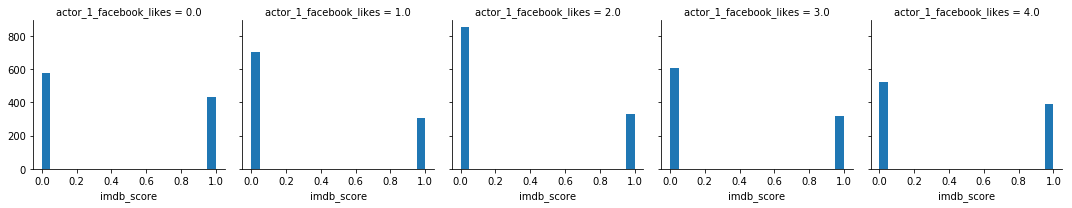

In [92]:
newActor1_FB = sns.FacetGrid(data, col='actor_1_facebook_likes')
newActor1_FB.map(plt.hist, 'imdb_score', bins=20)

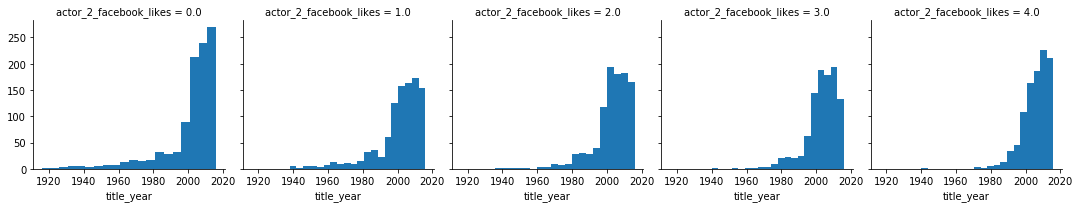

In [93]:
newActor2_FB = sns.FacetGrid(data, col='actor_2_facebook_likes')
newActor2_FB.map(plt.hist, 'title_year', bins=20)

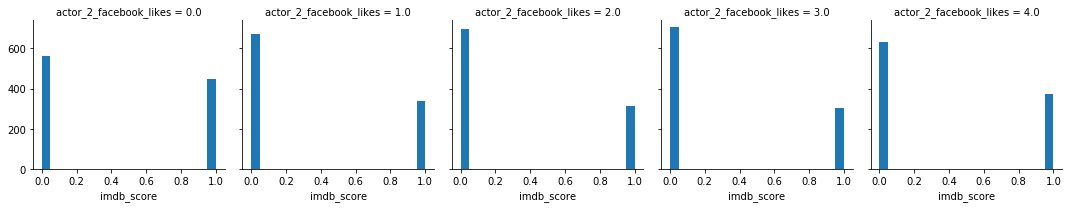

In [94]:
newActor2_FB = sns.FacetGrid(data, col='actor_2_facebook_likes')
newActor2_FB.map(plt.hist, 'imdb_score', bins=20)

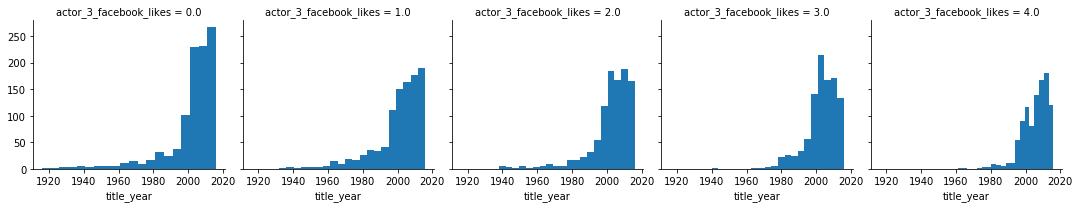

In [95]:
newActor3_FB = sns.FacetGrid(data, col='actor_3_facebook_likes')
newActor3_FB.map(plt.hist, 'title_year', bins=20)

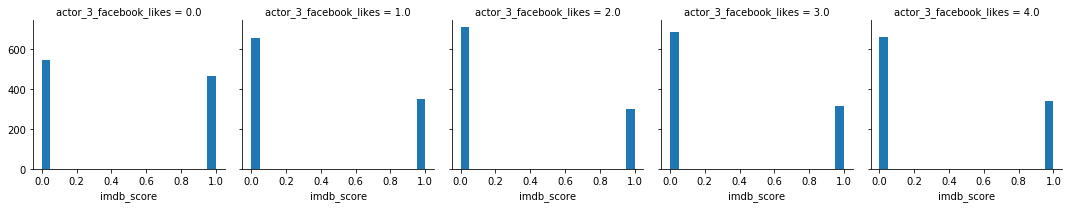

In [96]:
newActor3_FB = sns.FacetGrid(data, col='actor_3_facebook_likes')
newActor3_FB.map(plt.hist, 'imdb_score', bins=20)

### Duration

In this section, the figures representing the duration for each movie are cleaned up.<br>
First of all among these alterations is the replacing of any null values with the mean value.<br>
The mean values for the duration are displayed below.

In [97]:
durationMean = data['duration'].mean()
durationSD = data['duration'].std()
durationMean, durationSD

(107.20107398568017, 25.159931572315713)

In [98]:
data['duration'] = data['duration'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)

In [99]:
data[['duration']].groupby(pd.qcut(data['duration'], 5)).mean()

,duration
duration,
"(6.999, 91.0]",81.323529
"(91.0, 99.0]",95.591463
"(99.0, 108.0]",103.788515
"(108.0, 121.0]",114.533471
"(121.0, 511.0]",142.002976


If the duration band is less than or equal to 91 - duration = 0
If the duration band is greater than 91 and less than or equal to 99 - duration = 1<br>
If the duration band is greater than 99 and less than or equal to 108 - duration = 2<br>
If the duration is greater than 108 and less than or equal to 122 - duration = 3<br>
If the duration is greater than 122 - duration = 4

In [100]:
data.loc[ data['duration'] <= 91, 'duration'] = 0
data.loc[(data['duration'] > 91) & (data['duration'] <= 99), 'duration'] = 1
data.loc[(data['duration'] > 99) & (data['duration'] <= 108), 'duration'] = 2
data.loc[(data['duration'] > 108) & (data['duration'] <= 122), 'duration'] = 3
data.loc[ data['duration'] > 122, 'duration'] = 4

data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
0,0,723.000000,4.0,0.0,4.0,2.0,7.605058e+08,886204,4834,0.0,...,0,2,2.370000e+08,2009.000000,3.0,1.0,1.0,33000,0.0,0.0
1,0,302.000000,4.0,563.0,4.0,4.0,3.094042e+08,471220,48350,0.0,...,0,2,3.000000e+08,2007.000000,4.0,1.0,2.0,0,0.0,2.0
2,0,602.000000,4.0,0.0,1.0,3.0,2.000742e+08,275868,11700,1.0,...,1,2,2.450000e+08,2015.000000,1.0,0.0,2.0,85000,1.0,0.0
3,0,813.000000,4.0,22000.0,4.0,4.0,4.481306e+08,1144337,106759,0.0,...,0,2,2.500000e+08,2012.000000,4.0,1.0,2.0,164000,1.0,2.0
4,0,140.194272,2.0,131.0,3.0,0.0,4.846841e+07,8,143,0.0,...,0,4,3.975262e+07,2002.470517,0.0,1.0,2.0,0,0.0,0.0


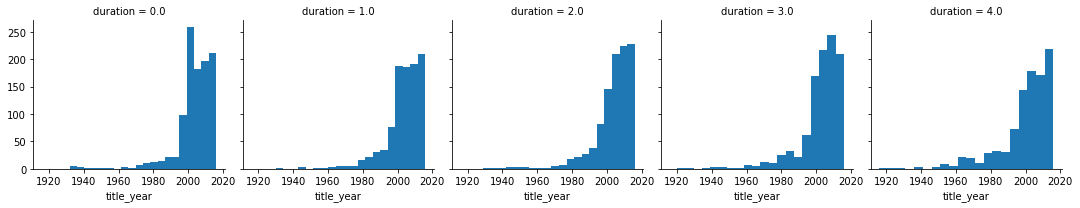

In [101]:
newDuration = sns.FacetGrid(data, col='duration')
newDuration.map(plt.hist, 'title_year', bins=20)

There appears to be quite an even spread the 5 duration bands in the dataset.

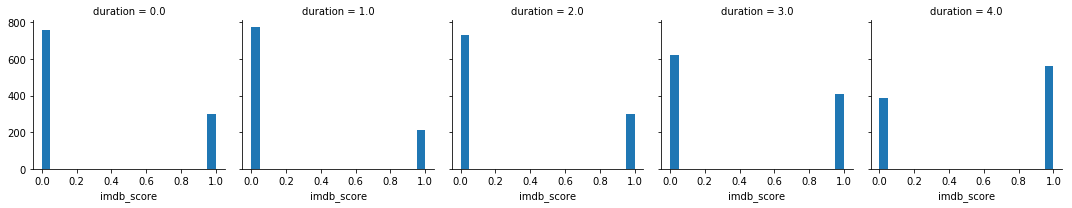

In [102]:
newDuration = sns.FacetGrid(data, col='duration')
newDuration.map(plt.hist, 'imdb_score', bins=20)

From this analysis, it appears the highest number of movies with a 70% or higher imdb_score are movies which have a duration band of 4. 

### Gross

In this section, the figures representing the gross earnings for each movie are cleaned up.<br>
First of all among these alterations is the replacing of any null values with the mean value.<br>
The mean values for the gross earnings are displayed below.

In [103]:
grossMean = data['gross'].mean()
grossSD = data['gross'].std()
grossMean, grossSD

(48468407.52680692, 62163183.48066527)

In [104]:
data['gross'] = data['gross'].map(lambda v: mean if pd.isnull(v) else v)

In [105]:
data['gross'].describe()

count    5.043000e+03
mean     4.846841e+07
std      6.216318e+07
min      1.620000e+02
25%      8.460992e+06
50%      3.743230e+07
75%      5.135707e+07
max      7.605058e+08
Name: gross, dtype: float64

Gross will be banded into 5 categories

In [106]:
data[['gross']].groupby(pd.qcut(data['gross'], 5)).mean()

,gross
gross,
"(161.999, 4909758.4]",1.309169e+06
"(4909758.4, 24092475.2]",1.338883e+07
"(24092475.2, 48468407.527]",4.204045e+07
"(48468407.527, 64212162.4]",5.575126e+07
"(64212162.4, 760505847.0]",1.392144e+08


In [107]:
data.loc[ data['gross'] <= 4909758.4, 'gross'] = 0
data.loc[(data['gross'] > 4909758.4) & (data['gross'] <= 24092475.2), 'gross'] = 1
data.loc[(data['gross'] > 24092475.2) & (data['gross'] <= 48468407.527), 'gross'] = 2
data.loc[(data['gross'] > 48468407.527) & (data['gross'] <= 64212162.4), 'gross'] = 3
data.loc[ data['gross'] > 64212162.4, 'gross'] = 4

data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
0,0,723.000000,4.0,0.0,4.0,2.0,4.0,886204,4834,0.0,...,0,2,2.370000e+08,2009.000000,3.0,1.0,1.0,33000,0.0,0.0
1,0,302.000000,4.0,563.0,4.0,4.0,4.0,471220,48350,0.0,...,0,2,3.000000e+08,2007.000000,4.0,1.0,2.0,0,0.0,2.0
2,0,602.000000,4.0,0.0,1.0,3.0,4.0,275868,11700,1.0,...,1,2,2.450000e+08,2015.000000,1.0,0.0,2.0,85000,1.0,0.0
3,0,813.000000,4.0,22000.0,4.0,4.0,4.0,1144337,106759,0.0,...,0,2,2.500000e+08,2012.000000,4.0,1.0,2.0,164000,1.0,2.0
4,0,140.194272,2.0,131.0,3.0,0.0,2.0,8,143,0.0,...,0,4,3.975262e+07,2002.470517,0.0,1.0,2.0,0,0.0,0.0


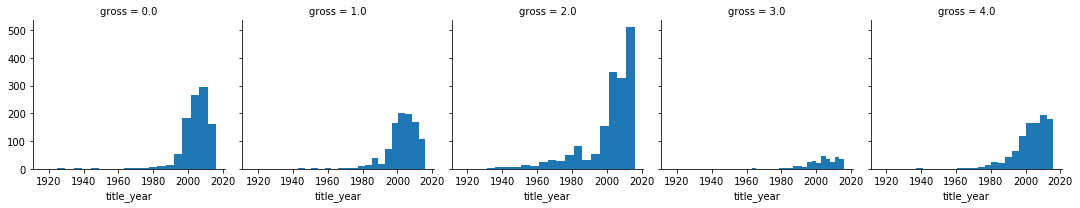

In [108]:
newGross = sns.FacetGrid(data, col='gross')
newGross.map(plt.hist, 'title_year', bins=20)

Based on the graph above, there is a higher percentage of with a gross band = 2 than any other gross band.

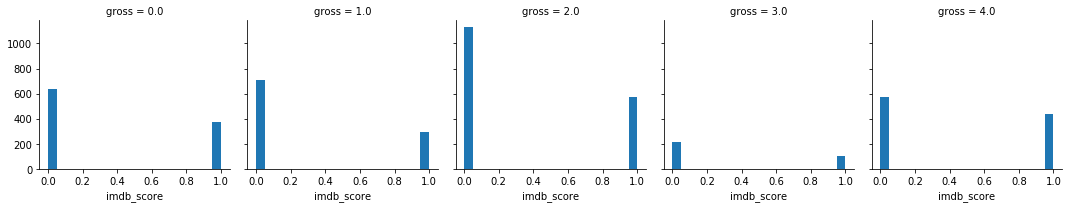

In [109]:
newGross = sns.FacetGrid(data, col='gross')
newGross.map(plt.hist, 'imdb_score', bins=20)

### Budget

In [110]:
budgetMean = data['budget'].mean()
budgetSD = data['budget'].std()
budgetMean, budgetSD

(39752620.436388634, 195800439.52477035)

In [111]:
data['budget'] = data['budget'].map(lambda v: mean if pd.isnull(v) else v)

In [112]:
data['budget'].describe()

count    5.043000e+03
mean     3.975262e+07
std      1.958004e+08
min      2.180000e+02
25%      7.000000e+06
50%      2.300000e+07
75%      4.000000e+07
max      1.221550e+10
Name: budget, dtype: float64

In [113]:
data[['budget']].groupby(pd.qcut(data['budget'], 3)).mean()

,budget
budget,
"(217.999, 12000000.0]",4.710360e+06
"(12000000.0, 39752620.436]",2.748087e+07
"(39752620.436, 12215500000.0]",1.054312e+08


In [114]:
data.loc[ data['budget'] <= 12000000, 'budget'] = 0
data.loc[(data['budget'] > 12000000) & (data['budget'] <= 39752620.436), 'budget'] = 1
data.loc[ data['budget'] > 39752620.436, 'budget'] = 2
data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
0,0,723.000000,4.0,0.0,4.0,2.0,4.0,886204,4834,0.0,...,0,2,2.0,2009.000000,3.0,1.0,1.0,33000,0.0,0.0
1,0,302.000000,4.0,563.0,4.0,4.0,4.0,471220,48350,0.0,...,0,2,2.0,2007.000000,4.0,1.0,2.0,0,0.0,2.0
2,0,602.000000,4.0,0.0,1.0,3.0,4.0,275868,11700,1.0,...,1,2,2.0,2015.000000,1.0,0.0,2.0,85000,1.0,0.0
3,0,813.000000,4.0,22000.0,4.0,4.0,4.0,1144337,106759,0.0,...,0,2,2.0,2012.000000,4.0,1.0,2.0,164000,1.0,2.0
4,0,140.194272,2.0,131.0,3.0,0.0,2.0,8,143,0.0,...,0,4,2.0,2002.470517,0.0,1.0,2.0,0,0.0,0.0


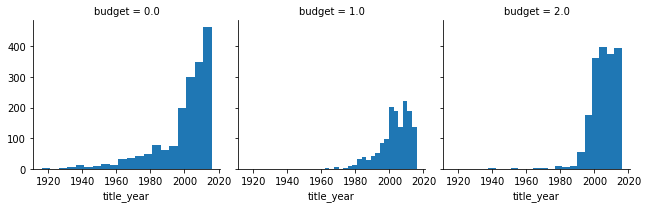

In [115]:
newBudget = sns.FacetGrid(data, col='budget')
newBudget.map(plt.hist, 'title_year', bins=20)

Based on the outputs above, it is shown that there is a higher percentage of category 1 (lower budget) and category 3 (higher budget) movies than there is category 2 (medium budget).

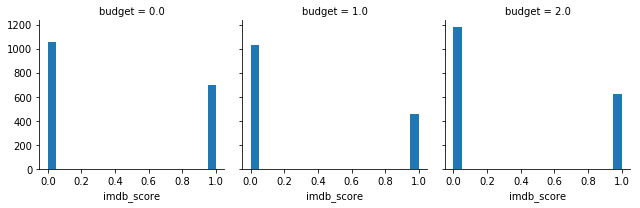

In [116]:
newBudget = sns.FacetGrid(data, col='budget')
newBudget.map(plt.hist, 'imdb_score', bins=20)

### Facenumber in poster

In [117]:
faceNumMean = data['facenumber_in_poster'].mean()
faceNumSD = data['facenumber_in_poster'].std()
faceNumMean, faceNumSD

(1.3711729622266398, 2.0109784009827063)

In [118]:
data['facenumber_in_poster'].value_counts()

0.000000     2152
1.000000     1251
2.000000      716
3.000000      380
4.000000      207
5.000000      114
6.000000       76
7.000000       48
8.000000       37
9.000000       18
1.371173       13
10.000000      10
15.000000       6
11.000000       5
12.000000       4
13.000000       2
43.000000       1
14.000000       1
31.000000       1
19.000000       1
Name: facenumber_in_poster, dtype: int64

In [119]:
data['facenumber_in_poster'].median()

1.0

In [120]:
data['facenumber_in_poster'] = data['facenumber_in_poster'].map(lambda v: 1 if pd.isnull(v) else v)

In [121]:
data['facenumber_in_poster'].describe()

count    5043.000000
mean        1.371173
std         2.010978
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        43.000000
Name: facenumber_in_poster, dtype: float64

In [122]:
data[['facenumber_in_poster']].groupby(pd.cut(data['facenumber_in_poster'], [-1,0,1,2,100])).mean()

,facenumber_in_poster
facenumber_in_poster,
"(-1, 0]",0.000000
"(0, 1]",1.000000
"(1, 2]",1.988786
"(2, 100]",4.625686


In [123]:
data.loc[ data['facenumber_in_poster'] <= 0, 'facenumber_in_poster'] = 0
data.loc[(data['facenumber_in_poster'] > 0) & (data['facenumber_in_poster'] <= 1), 'facenumber_in_poster'] = 1
data.loc[(data['facenumber_in_poster'] > 1) & (data['facenumber_in_poster'] <= 2), 'facenumber_in_poster'] = 2
data.loc[ data['facenumber_in_poster'] > 2, 'facenumber_in_poster'] = 3

data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
0,0,723.000000,4.0,0.0,4.0,2.0,4.0,886204,4834,0.0,...,0,2,2.0,2009.000000,3.0,1.0,1.0,33000,0.0,0.0
1,0,302.000000,4.0,563.0,4.0,4.0,4.0,471220,48350,0.0,...,0,2,2.0,2007.000000,4.0,1.0,2.0,0,0.0,2.0
2,0,602.000000,4.0,0.0,1.0,3.0,4.0,275868,11700,1.0,...,1,2,2.0,2015.000000,1.0,0.0,2.0,85000,1.0,0.0
3,0,813.000000,4.0,22000.0,4.0,4.0,4.0,1144337,106759,0.0,...,0,2,2.0,2012.000000,4.0,1.0,2.0,164000,1.0,2.0
4,0,140.194272,2.0,131.0,3.0,0.0,2.0,8,143,0.0,...,0,4,2.0,2002.470517,0.0,1.0,2.0,0,0.0,0.0


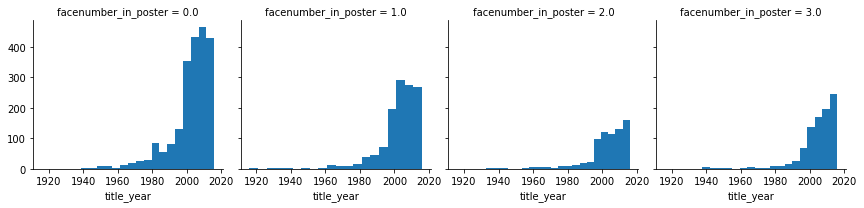

In [124]:
newFaceNum = sns.FacetGrid(data, col='facenumber_in_poster')
newFaceNum.map(plt.hist, 'title_year', bins=20)

Interestingly, movies that have no faces on the cover of their movie posters are the most popular over time

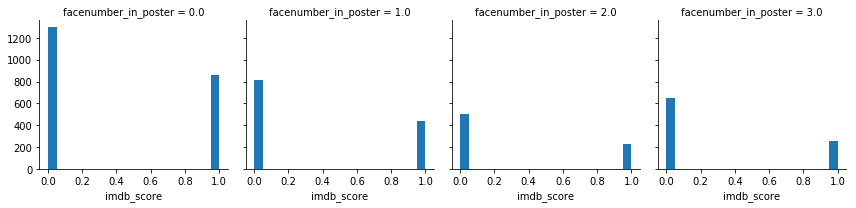

In [125]:
newFaceNum = sns.FacetGrid(data, col='facenumber_in_poster')
newFaceNum.map(plt.hist, 'imdb_score', bins=20)

### Number of films - Director

In [126]:
numDirectorMean = data['num_of_films_director'].mean()
numDirectorSD = data['num_of_films_director'].std()
numDirectorMean, numDirectorSD

(0.21514971247273448, 0.5575849212989642)

In [127]:
data['num_of_films_director'].describe()

count    5043.000000
mean        0.215150
std         0.557585
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: num_of_films_director, dtype: float64

In [128]:
data['num_of_films_director'].value_counts()

0.0    4228
1.0     633
2.0      94
3.0      88
Name: num_of_films_director, dtype: int64

In [129]:
data['num_of_films_director'] = data['num_of_films_director'].map(lambda v: 1 if pd.isnull(v) else v)

In [130]:
data[['num_of_films_director']].groupby(pd.cut(data['num_of_films_director'], 3)).mean()

,num_of_films_director
num_of_films_director,
"(-0.003, 1.0]",0.13022
"(1.0, 2.0]",2.00000
"(2.0, 3.0]",3.00000


In [131]:
data.loc[ data['num_of_films_director'] <= 1, 'num_of_films_director'] = 0
data.loc[(data['num_of_films_director'] > 1) & (data['num_of_films_director'] <= 2), 'num_of_films_director'] = 1
data.loc[ data['num_of_films_director'] > 2, 'num_of_films_director'] = 2
data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
0,0,723.000000,4.0,0.0,4.0,2.0,4.0,886204,4834,0.0,...,0,2,2.0,2009.000000,3.0,1.0,1.0,33000,0.0,0.0
1,0,302.000000,4.0,563.0,4.0,4.0,4.0,471220,48350,0.0,...,0,2,2.0,2007.000000,4.0,1.0,2.0,0,0.0,2.0
2,0,602.000000,4.0,0.0,1.0,3.0,4.0,275868,11700,1.0,...,1,2,2.0,2015.000000,1.0,0.0,2.0,85000,0.0,0.0
3,0,813.000000,4.0,22000.0,4.0,4.0,4.0,1144337,106759,0.0,...,0,2,2.0,2012.000000,4.0,1.0,2.0,164000,0.0,2.0
4,0,140.194272,2.0,131.0,3.0,0.0,2.0,8,143,0.0,...,0,4,2.0,2002.470517,0.0,1.0,2.0,0,0.0,0.0


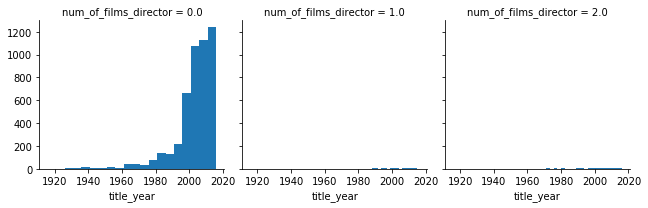

In [132]:
newDirector = sns.FacetGrid(data, col='num_of_films_director')
newDirector.map(plt.hist, 'title_year', bins=20)

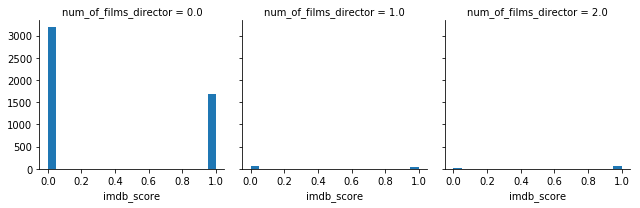

In [133]:
newDirector = sns.FacetGrid(data, col='num_of_films_director')
newDirector.map(plt.hist, 'imdb_score', bins=20)

### Number of critics for reviews

In [134]:
numCriticsMean = data['num_critic_for_reviews'].mean()
numCriticsSD = data['num_critic_for_reviews'].std()
numCriticsMean, numCriticsSD

(140.1942719807732, 120.9972294851163)

In [135]:
data['num_critic_for_reviews'] = data['num_critic_for_reviews'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)

In [136]:
data[['num_critic_for_reviews']].groupby(pd.qcut(data['num_critic_for_reviews'], 5)).mean()

,num_critic_for_reviews
num_critic_for_reviews,
"(0.999, 40.0]",18.989300
"(40.0, 84.0]",62.360721
"(84.0, 140.194]",112.870255
"(140.194, 222.0]",176.537056
"(222.0, 813.0]",335.539619


In [137]:
data.loc[ data['num_critic_for_reviews'] <= 40, 'num_critic_for_reviews'] = 0
data.loc[(data['num_critic_for_reviews'] > 40) & (data['num_critic_for_reviews'] <= 84), 'num_critic_for_reviews'] = 1
data.loc[(data['num_critic_for_reviews'] > 84) & (data['num_critic_for_reviews'] <= 140), 'num_critic_for_reviews'] = 2
data.loc[(data['num_critic_for_reviews'] > 140) & (data['num_critic_for_reviews'] <= 222), 'num_critic_for_reviews'] = 3
data.loc[ data['num_critic_for_reviews'] > 222, 'num_critic_for_reviews'] = 4

data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
0,0,4.0,4.0,0.0,4.0,2.0,4.0,886204,4834,0.0,...,0,2,2.0,2009.000000,3.0,1.0,1.0,33000,0.0,0.0
1,0,4.0,4.0,563.0,4.0,4.0,4.0,471220,48350,0.0,...,0,2,2.0,2007.000000,4.0,1.0,2.0,0,0.0,2.0
2,0,4.0,4.0,0.0,1.0,3.0,4.0,275868,11700,1.0,...,1,2,2.0,2015.000000,1.0,0.0,2.0,85000,0.0,0.0
3,0,4.0,4.0,22000.0,4.0,4.0,4.0,1144337,106759,0.0,...,0,2,2.0,2012.000000,4.0,1.0,2.0,164000,0.0,2.0
4,0,3.0,2.0,131.0,3.0,0.0,2.0,8,143,0.0,...,0,4,2.0,2002.470517,0.0,1.0,2.0,0,0.0,0.0


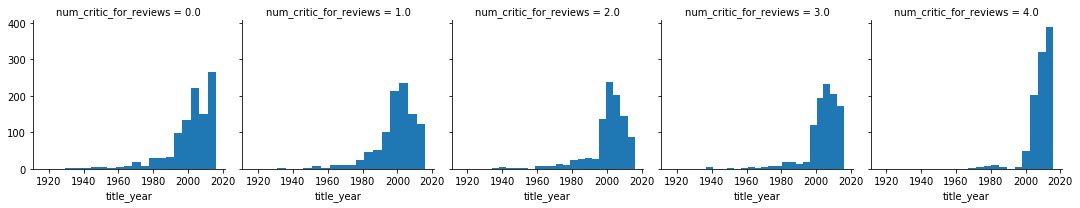

In [138]:
newCritics = sns.FacetGrid(data, col='num_critic_for_reviews')
newCritics.map(plt.hist, 'title_year', bins=20)

There appears to be far more critics in recent years.

### Director facebook likes

In [139]:
directorFBMean = data['director_facebook_likes'].mean()
directorFBSD = data['director_facebook_likes'].std()
directorFBMean, directorFBSD

(686.5092123911702, 2784.162530545837)

In [140]:
data['director_facebook_likes'] = data['director_facebook_likes'].map(lambda v: mean if pd.isnull(v) else v)

In [141]:
data[['director_facebook_likes']].groupby(pd.qcut(data['director_facebook_likes'], 5)).mean()

,director_facebook_likes
director_facebook_likes,
"(-0.001, 3.0]",0.323077
"(3.0, 27.8]",13.329580
"(27.8, 91.0]",54.767717
"(91.0, 309.0]",175.680915
"(309.0, 23000.0]",3203.513902


In [142]:
data.loc[ data['director_facebook_likes'] <= 3, 'director_facebook_likes'] = 0
data.loc[(data['director_facebook_likes'] > 3) & (data['director_facebook_likes'] <= 27.8), 'director_facebook_likes'] = 1
data.loc[(data['director_facebook_likes'] > 27.8) & (data['director_facebook_likes'] <= 91), 'director_facebook_likes'] = 2
data.loc[(data['director_facebook_likes'] > 91) & (data['director_facebook_likes'] <= 309), 'director_facebook_likes'] = 3
data.loc[ data['director_facebook_likes'] > 309, 'director_facebook_likes'] = 4

data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
0,0,4.0,4.0,0.0,4.0,2.0,4.0,886204,4834,0.0,...,0,2,2.0,2009.000000,3.0,1.0,1.0,33000,0.0,0.0
1,0,4.0,4.0,4.0,4.0,4.0,4.0,471220,48350,0.0,...,0,2,2.0,2007.000000,4.0,1.0,2.0,0,0.0,2.0
2,0,4.0,4.0,0.0,1.0,3.0,4.0,275868,11700,1.0,...,1,2,2.0,2015.000000,1.0,0.0,2.0,85000,0.0,0.0
3,0,4.0,4.0,4.0,4.0,4.0,4.0,1144337,106759,0.0,...,0,2,2.0,2012.000000,4.0,1.0,2.0,164000,0.0,2.0
4,0,3.0,2.0,3.0,3.0,0.0,2.0,8,143,0.0,...,0,4,2.0,2002.470517,0.0,1.0,2.0,0,0.0,0.0


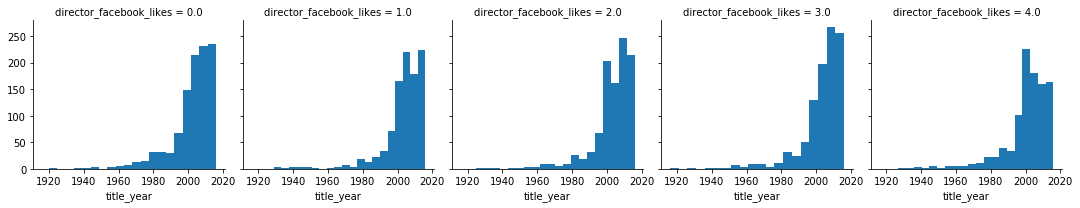

In [143]:
newDirectorFB = sns.FacetGrid(data, col='director_facebook_likes')
newDirectorFB.map(plt.hist, 'title_year', bins=20)

### Number of users for reviews

In [144]:
numUserRevMean = data['num_user_for_reviews'].mean()
numUserRevSD = data['num_user_for_reviews'].std()
numUserRevMean, numUserRevSD

(272.7708084428517, 377.19491224667286)

In [145]:
data['num_user_for_reviews'] = data['num_user_for_reviews'].map(lambda v: mean if pd.isnull(v) else v)

In [146]:
data['num_user_for_reviews'].describe()

count    5043.000000
mean      272.770808
std       377.194912
min         1.000000
25%        65.000000
50%       157.000000
75%       324.000000
max      5060.000000
Name: num_user_for_reviews, dtype: float64

In [147]:
data[['num_user_for_reviews']].groupby(pd.qcut(data['num_user_for_reviews'], 5)).mean()

,num_user_for_reviews
num_user_for_reviews,
"(0.999, 48.0]",22.003960
"(48.0, 116.0]",81.848365
"(116.0, 210.0]",159.629336
"(210.0, 389.0]",286.411308
"(389.0, 5060.0]",814.773810


In [148]:
data.loc[ data['num_user_for_reviews'] <= 48, 'num_user_for_reviews'] = 0
data.loc[(data['num_user_for_reviews'] > 48) & (data['num_user_for_reviews'] <= 116), 'num_user_for_reviews'] = 1
data.loc[(data['num_user_for_reviews'] > 116) & (data['num_user_for_reviews'] <= 210), 'num_user_for_reviews'] = 2
data.loc[(data['num_user_for_reviews'] > 210) & (data['num_user_for_reviews'] <= 389), 'num_user_for_reviews'] = 3
data.loc[ data['num_user_for_reviews'] > 389, 'num_user_for_reviews'] = 4

data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
0,0,4.0,4.0,0.0,4.0,2.0,4.0,886204,4834,0.0,...,0,2,2.0,2009.000000,3.0,1.0,1.0,33000,0.0,0.0
1,0,4.0,4.0,4.0,4.0,4.0,4.0,471220,48350,0.0,...,0,2,2.0,2007.000000,4.0,1.0,2.0,0,0.0,2.0
2,0,4.0,4.0,0.0,1.0,3.0,4.0,275868,11700,1.0,...,1,2,2.0,2015.000000,1.0,0.0,2.0,85000,0.0,0.0
3,0,4.0,4.0,4.0,4.0,4.0,4.0,1144337,106759,0.0,...,0,2,2.0,2012.000000,4.0,1.0,2.0,164000,0.0,2.0
4,0,3.0,2.0,3.0,3.0,0.0,2.0,8,143,0.0,...,0,4,2.0,2002.470517,0.0,1.0,2.0,0,0.0,0.0


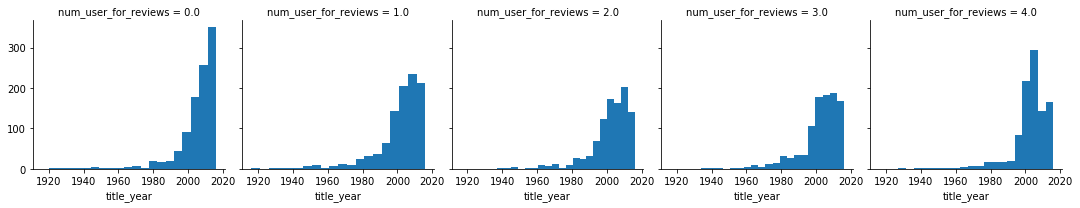

In [149]:
newUserRev = sns.FacetGrid(data, col='num_user_for_reviews')
newUserRev.map(plt.hist, 'title_year', bins=20)

### Number of voted users

In [150]:
numUserVMean = data['num_voted_users'].mean()
numUserVSD = data['num_voted_users'].std()
numUserVMean, numUserVSD

(83668.16081697402, 138485.25680596207)

In [151]:
data['num_voted_users'] = data['num_voted_users'].map(lambda v: mean if pd.isnull(v) else v)

In [152]:
data['num_voted_users'].describe()

count    5.043000e+03
mean     8.366816e+04
std      1.384853e+05
min      5.000000e+00
25%      8.593500e+03
50%      3.435900e+04
75%      9.630900e+04
max      1.689764e+06
Name: num_voted_users, dtype: float64

In [153]:
data[['num_voted_users']].groupby(pd.qcut(data['num_voted_users'], 5)).mean()

,num_voted_users
num_voted_users,
"(4.999, 5623.8]",2063.805748
"(5623.8, 21478.4]",12599.737103
"(21478.4, 53178.2]",35314.418236
"(53178.2, 124087.0]",81242.864087
"(124087.0, 1689764.0]",287047.140733


In [154]:
data.loc[ data['num_voted_users'] <= 5623.8, 'num_voted_users'] = 0
data.loc[(data['num_voted_users'] > 5623.8) & (data['num_voted_users'] <= 21478.4), 'num_voted_users'] = 1
data.loc[(data['num_voted_users'] > 21478.4) & (data['num_voted_users'] <= 53178.2), 'num_voted_users'] = 2
data.loc[(data['num_voted_users'] > 53178.2) & (data['num_voted_users'] <= 1.24e+05), 'num_voted_users'] = 3
data.loc[ data['num_voted_users'] > 1.24e+05, 'num_voted_users'] = 4

data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
0,0,4.0,4.0,0.0,4.0,2.0,4.0,4,4834,0.0,...,0,2,2.0,2009.000000,3.0,1.0,1.0,33000,0.0,0.0
1,0,4.0,4.0,4.0,4.0,4.0,4.0,4,48350,0.0,...,0,2,2.0,2007.000000,4.0,1.0,2.0,0,0.0,2.0
2,0,4.0,4.0,0.0,1.0,3.0,4.0,4,11700,1.0,...,1,2,2.0,2015.000000,1.0,0.0,2.0,85000,0.0,0.0
3,0,4.0,4.0,4.0,4.0,4.0,4.0,4,106759,0.0,...,0,2,2.0,2012.000000,4.0,1.0,2.0,164000,0.0,2.0
4,0,3.0,2.0,3.0,3.0,0.0,2.0,0,143,0.0,...,0,4,2.0,2002.470517,0.0,1.0,2.0,0,0.0,0.0


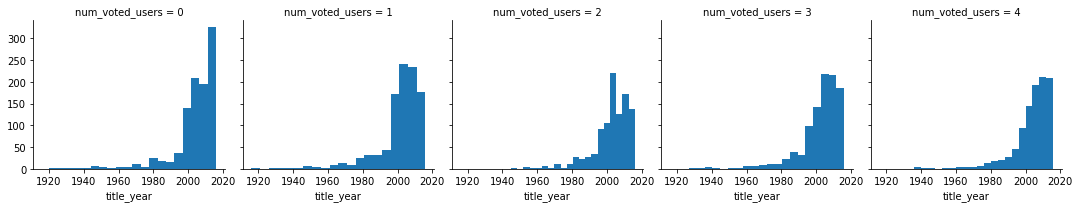

In [155]:
newUserVote = sns.FacetGrid(data, col='num_voted_users')
newUserVote.map(plt.hist, 'title_year', bins=20)

### Cast total facebook likes

In [156]:
castFBMean = data['cast_total_facebook_likes'].mean()
castFBSD = data['cast_total_facebook_likes'].std()
castFBMean, castFBSD

(9699.06385088241, 18163.799124045912)

In [157]:
data['cast_total_facebook_likes'] = data['cast_total_facebook_likes'].map(lambda v: mean if pd.isnull(v) else v)

In [158]:
data['cast_total_facebook_likes'].describe()

count      5043.000000
mean       9699.063851
std       18163.799124
min           0.000000
25%        1411.000000
50%        3090.000000
75%       13756.500000
max      656730.000000
Name: cast_total_facebook_likes, dtype: float64

In [159]:
data[['cast_total_facebook_likes']].groupby(pd.qcut(data['cast_total_facebook_likes'], 5)).mean()

,cast_total_facebook_likes
cast_total_facebook_likes,
"(-0.001, 1136.0]",522.920792
"(1136.0, 2366.6]",1725.176763
"(2366.6, 4369.2]",3172.140733
"(4369.2, 16285.8]",10094.041667
"(16285.8, 656730.0]",32974.719524


In [160]:
data.loc[ data['cast_total_facebook_likes'] <= 1136, 'cast_total_facebook_likes'] = 0
data.loc[(data['cast_total_facebook_likes'] > 1136) & (data['cast_total_facebook_likes'] <= 2366.6), 'cast_total_facebook_likes'] = 1
data.loc[(data['cast_total_facebook_likes'] > 2366.6) & (data['cast_total_facebook_likes'] <= 4369.2), 'cast_total_facebook_likes'] = 2
data.loc[(data['cast_total_facebook_likes'] > 4369.2) & (data['cast_total_facebook_likes'] <= 16285.8), 'cast_total_facebook_likes'] = 3
data.loc[ data['cast_total_facebook_likes'] > 16285.8, 'cast_total_facebook_likes'] = 4

data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
0,0,4.0,4.0,0.0,4.0,2.0,4.0,4,3,0.0,...,0,2,2.0,2009.000000,3.0,1.0,1.0,33000,0.0,0.0
1,0,4.0,4.0,4.0,4.0,4.0,4.0,4,4,0.0,...,0,2,2.0,2007.000000,4.0,1.0,2.0,0,0.0,2.0
2,0,4.0,4.0,0.0,1.0,3.0,4.0,4,3,1.0,...,1,2,2.0,2015.000000,1.0,0.0,2.0,85000,0.0,0.0
3,0,4.0,4.0,4.0,4.0,4.0,4.0,4,4,0.0,...,0,2,2.0,2012.000000,4.0,1.0,2.0,164000,0.0,2.0
4,0,3.0,2.0,3.0,3.0,0.0,2.0,0,0,0.0,...,0,4,2.0,2002.470517,0.0,1.0,2.0,0,0.0,0.0


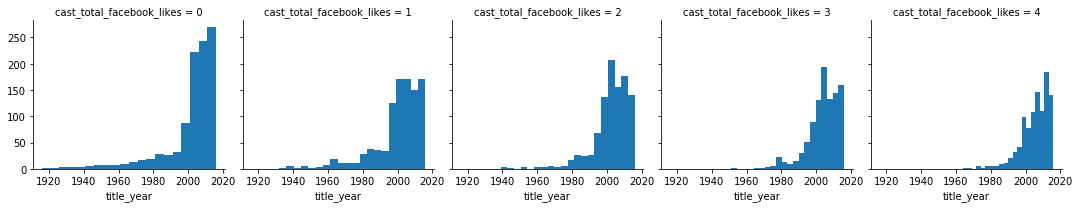

In [161]:
newCastFB = sns.FacetGrid(data, col='cast_total_facebook_likes')
newCastFB.map(plt.hist, 'title_year', bins=20)

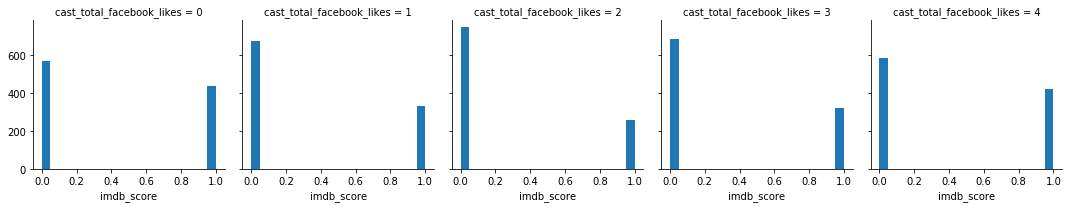

In [162]:
newCastFB = sns.FacetGrid(data, col='cast_total_facebook_likes')
newCastFB.map(plt.hist, 'imdb_score', bins=20)

### Movie facebook likes

In [163]:
movieFBMean = data['movie_facebook_likes'].mean()
movieFBSD = data['movie_facebook_likes'].std()
movieFBMean, movieFBSD

(7525.9645052548085, 19320.445109946737)

In [164]:
data['movie_facebook_likes'] = data['movie_facebook_likes'].map(lambda v: mean if pd.isnull(v) else v)

In [165]:
data['movie_facebook_likes'].describe()

count      5043.000000
mean       7525.964505
std       19320.445110
min           0.000000
25%           0.000000
50%         166.000000
75%        3000.000000
max      349000.000000
Name: movie_facebook_likes, dtype: float64

In [166]:
data[data['movie_facebook_likes'] > 0][['movie_facebook_likes']].groupby(pd.qcut(data[data['movie_facebook_likes'] > 0]['movie_facebook_likes'], 4)).mean()

,movie_facebook_likes
movie_facebook_likes,
"(1.999, 401.0]",184.490934
"(401.0, 1000.0]",725.322139
"(1000.0, 17000.0]",10425.727412
"(17000.0, 349000.0]",44229.651163


In [167]:
data.loc[ data['movie_facebook_likes'] <= 0, 'movie_facebook_likes'] = 0
data.loc[(data['movie_facebook_likes'] > 0) & (data['movie_facebook_likes'] <= 401), 'movie_facebook_likes'] = 1
data.loc[(data['movie_facebook_likes'] > 401) & (data['movie_facebook_likes'] <= 1000), 'movie_facebook_likes'] = 2
data.loc[(data['movie_facebook_likes'] > 1000) & (data['movie_facebook_likes'] <= 17000), 'movie_facebook_likes'] = 3
data.loc[ data['movie_facebook_likes'] > 17000, 'movie_facebook_likes'] = 3

data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
0,0,4.0,4.0,0.0,4.0,2.0,4.0,4,3,0.0,...,0,2,2.0,2009.000000,3.0,1.0,1.0,3,0.0,0.0
1,0,4.0,4.0,4.0,4.0,4.0,4.0,4,4,0.0,...,0,2,2.0,2007.000000,4.0,1.0,2.0,0,0.0,2.0
2,0,4.0,4.0,0.0,1.0,3.0,4.0,4,3,1.0,...,1,2,2.0,2015.000000,1.0,0.0,2.0,3,0.0,0.0
3,0,4.0,4.0,4.0,4.0,4.0,4.0,4,4,0.0,...,0,2,2.0,2012.000000,4.0,1.0,2.0,3,0.0,2.0
4,0,3.0,2.0,3.0,3.0,0.0,2.0,0,0,0.0,...,0,4,2.0,2002.470517,0.0,1.0,2.0,0,0.0,0.0


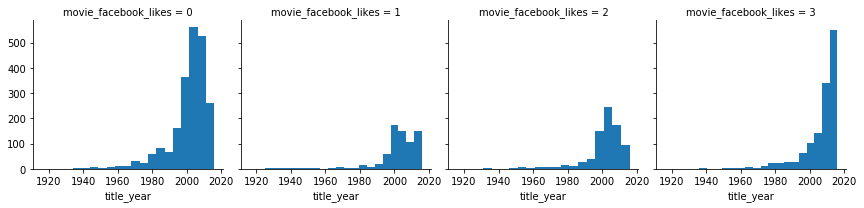

In [168]:
newMovieFB = sns.FacetGrid(data, col='movie_facebook_likes')
newMovieFB.map(plt.hist, 'title_year', bins=20)

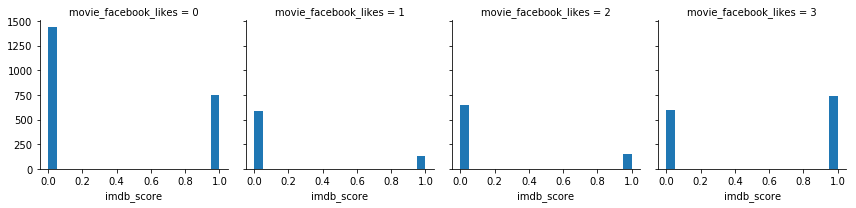

In [169]:
newMovieFB = sns.FacetGrid(data, col='movie_facebook_likes')
newMovieFB.map(plt.hist, 'imdb_score', bins=20)

### Title year

In [170]:
titleYearMean = data['title_year'].mean()
titleYearSD = data['title_year'].std()
titleYearMean, titleYearSD

(2002.4705167173222, 12.340272304285083)

In [171]:
data['title_year'] = data['title_year'].map(lambda v: truncnorm.rvs(-1, 1, loc=mean, scale=std) if pd.isnull(v) else v)

In [172]:
data['title_year'].describe()

count    5043.000000
mean     2002.470517
std        12.340272
min      1916.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2016.000000
Name: title_year, dtype: float64

In [173]:
data[['title_year']].groupby(pd.cut(data['title_year'], 5)).mean()

,title_year
title_year,
"(1915.9, 1936.0]",1929.642857
"(1936.0, 1956.0]",1947.240741
"(1956.0, 1976.0]",1968.262069
"(1976.0, 1996.0]",1988.964539
"(1996.0, 2016.0]",2006.951470


In [174]:
data.loc[ data['title_year'] <= 1936, 'title_year'] = 0
data.loc[(data['title_year'] > 1936) & (data['title_year'] <= 1956), 'title_year'] = 1
data.loc[(data['title_year'] > 1956) & (data['title_year'] <= 1976), 'title_year'] = 2
data.loc[(data['title_year'] > 1976) & (data['title_year'] <= 1996), 'title_year'] = 3
data.loc[ data['title_year'] > 1996, 'title_year'] = 4

data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,actor_sum
0,0,4.0,4.0,0.0,4.0,2.0,4.0,4,3,0.0,...,0,2,2.0,4.0,3.0,1.0,1.0,3,0.0,0.0
1,0,4.0,4.0,4.0,4.0,4.0,4.0,4,4,0.0,...,0,2,2.0,4.0,4.0,1.0,2.0,0,0.0,2.0
2,0,4.0,4.0,0.0,1.0,3.0,4.0,4,3,1.0,...,1,2,2.0,4.0,1.0,0.0,2.0,3,0.0,0.0
3,0,4.0,4.0,4.0,4.0,4.0,4.0,4,4,0.0,...,0,2,2.0,4.0,4.0,1.0,2.0,3,0.0,2.0
4,0,3.0,2.0,3.0,3.0,0.0,2.0,0,0,0.0,...,0,4,2.0,4.0,0.0,1.0,2.0,0,0.0,0.0


Finally, a check to see if any missing values are still present in the dataset.

In [175]:
emptyColumns = data.columns[pd.isnull(data).any()].tolist()
data[emptyColumns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Empty DataFrame

### 11. Training

In this section, the machine learning algorithms are installed and the dataset, which has now been fully cleaned up, is split into training and testing sets. Then the imdb_score column is removed from the dataset. The remaining columns are enumerated and the machine learning algorithms run.<br>
The type of machine learning that will be carried out is known as supervised machine learning, where the algorithm utilizes known data in order to make predictions. Regression and Classification algorithms are two types of supervised learning but differ slightly.<br>
Regression outputs a numerical variable and classification outputs a categorial variable.<br>
In more detail, the mapping fuction of a classification is used for mapping values to predefined classes.<br>
Examples of classification algorithms are: Decisions Tree's, Logistic Regression, Support Vector Machines and Gaussian Naive Bayes.<br>
The mapping fuction in Regression algorithms is used for mapping of values to continuous output.<br>
Examples of regression algorithms are Random forest, Linear Regression<br>
https://medium.com/quick-code/regression-versus-classification-machine-learning-whats-the-difference-345c56dd15f7
The Machine Learning algorithms used are:<br>
1) Logistic Regression<br>
2) Decision Tree<br>
3) k-Nearest Neighbor<br>
4) Random Forest<br>
5) Support Vector Machines<br>
6) Gaussian Naive Bayes

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

The dataset is split into training data and test data in an 80:20 ratio

In [177]:
train_data, test_data = train_test_split(data, test_size = 0.2)

The imdb_score is removed from the training and testing data

In [178]:
X_train = train_data.drop("imdb_score", axis=1)
Y_train = train_data["imdb_score"]
X_test  = test_data.drop("imdb_score", axis=1)
Y_test = test_data["imdb_score"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((4034, 21), (4034,), (1009, 21), (1009,))

In [179]:
for i, value in enumerate(train_data.columns):
    print (i, value)

0 color
1 num_critic_for_reviews
2 duration
3 director_facebook_likes
4 actor_3_facebook_likes
5 actor_1_facebook_likes
6 gross
7 num_voted_users
8 cast_total_facebook_likes
9 facenumber_in_poster
10 num_user_for_reviews
11 language
12 country
13 content_rating
14 budget
15 title_year
16 actor_2_facebook_likes
17 imdb_score
18 aspect_ratio
19 movie_facebook_likes
20 num_of_films_director
21 actor_sum


### Logistic Regression

In the cell below, the model is being fitted on the training data (X_train & Y_train). Once that is done, the model makes predictions on the test data (X_test). Finally the predicted score is generated.

In [180]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


74.91

### Prediction accuracy of Logistic Regression

In [181]:
accuracy_score(Y_test, Y_pred, normalize=False), '/', len(Y_test)

(780, '/', 1009)

In [182]:
accuracy_score(Y_test, Y_pred)

0.7730426164519326

An advantage of logistic regression is the ability to see a breakdown of the correlation coefficiants that were found.

In [183]:
logreg_coeff_data = pd.DataFrame(train_data.columns.delete(17))
logreg_coeff_data.columns = ['Feature']
logreg_coeff_data["Correlation"] = pd.Series(logreg.coef_[0])
def row_style(row):
        if row.Correlation < 0:
            return pd.Series('background-color: pink', row.index)
        else:
            return pd.Series('background-color: lightgreen', row.index)

logreg_coeff_data.sort_values(by='Correlation', ascending=False).style.apply(row_style, axis=1)


#logreg_coeff_data.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
11,language,1.11583
0,color,0.825242
7,num_voted_users,0.59394
12,country,0.528042
19,num_of_films_director,0.231979
13,content_rating,0.226752
2,duration,0.21329
20,actor_sum,0.190493
18,movie_facebook_likes,0.187537
10,num_user_for_reviews,0.0933416


In [184]:
export_csv = logreg_coeff_data.to_csv (r'/Users/newuser/Desktop/Neil_Sankar_T00170945_Big_Data/coeff/logreg_coeff.csv', index = None, header=True)

Text(0, 0.5, 'Correlation')

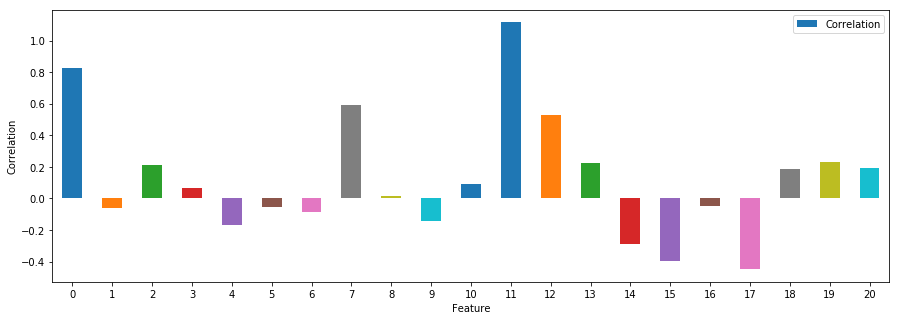

In [185]:
BarChart = logreg_coeff_data.plot.bar(y='Correlation', rot=0, figsize=(15,5))
plt.xlabel('Feature')
plt.ylabel('Correlation')

### Decision Tree

In [186]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_dtree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_dtree

99.85

###  Prediction accuracy of Decision Tree

In [187]:
accuracy_score(Y_test, Y_pred, normalize=False), '/', len(Y_test)

(746, '/', 1009)

In [188]:
accuracy_score(Y_test, Y_pred)

0.7393458870168483

### k-Nearest Neighbor

In [189]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.41

### Prediction accurary of k_Nearest Neighbor

In [190]:
accuracy_score(Y_test, Y_pred, normalize=False), '/', len(Y_test)

(745, '/', 1009)

In [191]:
accuracy_score(Y_test, Y_pred)

0.7383548067393458

### Random Forest

In [192]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_rforest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_rforest

99.85

### Prediction Accuracy of Random Forest

In [193]:
accuracy_score(Y_test, Y_pred, normalize=False), '/', len(Y_test)

(801, '/', 1009)

In [194]:
accuracy_score(Y_test, Y_pred)

0.7938553022794846

### Support Vector Machines

In [195]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.14

### Prediction Accuracy of SVM

In [196]:
accuracy_score(Y_test, Y_pred, normalize=False), '/', len(Y_test)

(799, '/', 1009)

In [197]:
accuracy_score(Y_test, Y_pred)

0.7918731417244796

### Naive Bayes

In [198]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gnb = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gnb

72.83

### Prediction accuracy of Naive Bayes

In [199]:
accuracy_score(Y_test, Y_pred, normalize=False), '/', len(Y_test)

(715, '/', 1009)

In [200]:
accuracy_score(Y_test, Y_pred)

0.7086223984142715

### Summary of Model Scores

In [201]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'k-Nearest Neighbor', 
              'Random Forest', 'Support Vector Machines', 'Gaussian Naive Bayes'
             ],
    'Score': [acc_log, acc_dtree, acc_knn, acc_rforest, acc_svc, acc_gnb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Decision Tree,99.85
3,Random Forest,99.85
2,k-Nearest Neighbor,84.41
4,Support Vector Machines,83.14
0,Logistic Regression,74.91
5,Gaussian Naive Bayes,72.83


Text(0, 0.5, 'Score')

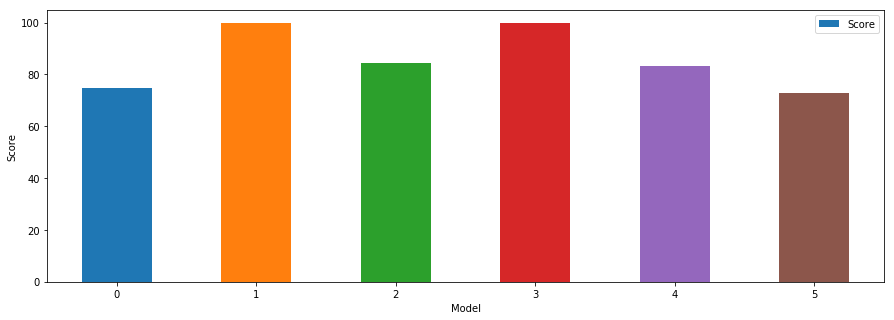

In [202]:
models.plot.bar(y='Score', rot=0, figsize=(15,5))
plt.xlabel('Model')
plt.ylabel('Score')

### Conclusion

Decision Tree and Random Forest performed the best in terms of accuracy on their training data, both neck and neck at 99.88% accuracy. However, Random Forest predicted the imdb_rating of 794 movies compared to 720 for Decision Tree.

Yes, movie ratings can be predicted using these Machine learning algorithms.<br>
Yes, these ratings can be predicted to a high degree of over 70% accuracy.<br>

### References

- Titanic Data Science Solutions https://www.kaggle.com/startupsci/titanic-data-science-solutions<br>
- Predicting Movie Ratings Using IMDb Dataset https://github.com/aksh4y/IMDb-Rating-Prediction<br>
- Predicting IMDb Ratings https://jocelyn-ong.github.io/predicting-IMDb-ratings/<br>
- Predict Movie Rating https://nycdatascience.com/blog/student-works/machine-learning/movie-rating-prediction/<br>
- https://stackoverflow.com/questions/18441779/how-to-specify-upper-and-lower-limits-when-using-numpy-random-normal<br>
- Prediction of Movies popularity Using Machine Learning Techniques http://paper.ijcsns.org/07_book/201608/20160820.pdf<br>
- Predict movie's IMDb Rating https://github.com/sundeepblue/movie_rating_prediction<br>
- A Journey Through Titanic https://www.kaggle.com/omarelgabry/a-journey-through-titanic<br>
- IMDb Predictive Analysis https://github.com/jmhummel/IMDb-predictive-analytics
